 Sommaire 
-  <a href="#C1">Importation des données</a>
-  <a href="#C2">Fichier client</a>
-  <a href="#C3">Fichier produit</a>
-  <a href="#C4">Fichier transactions</a>


- <a name="C1">Importation des données</a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import re
from numpy import arange

In [2]:
data_cust = pd.read_csv('customers.csv')
data_prod = pd.read_csv('products.csv')
data_trans = pd.read_csv('transactions.csv')

## <a name="C2">Fichier client</a>

In [3]:
data_cust.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [4]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
print(data_cust.isnull().sum())
#vérification des valeurs nulles sur toutes les colonnes

client_id    0
sex          0
birth        0
dtype: int64


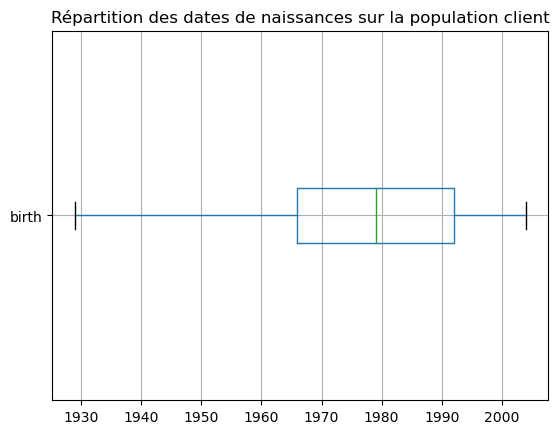

In [6]:
data_cust.boxplot(column="birth", vert=False)
plt.title("Répartition des dates de naissances sur la population client")
plt.show()
#bam répartiton des individus 'birth'
#valeurs cohérentes

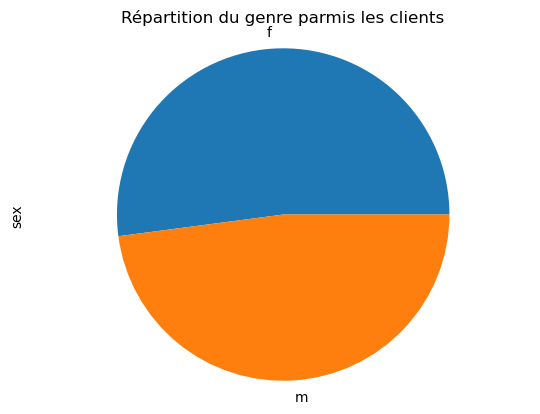

In [7]:
data_cust["sex"].value_counts(normalize=True).plot(kind='pie')
plt.title("Répartition du genre parmis les clients")
plt.axis('equal') 
plt.show()
#représentation de la répartitions des volumes d'individus 'sexe' 

In [8]:
data_cust.describe()

birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000

In [9]:
data_cust.loc[data_cust['client_id'].duplicated(keep=False),:]
#vérification des doublons sur client_id, confirme l'unicité

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []

In [10]:
data_cust['age du client en 2023'] = (2023 - data_cust.loc[: , ['birth']])
display(data_cust)

client_id sex  birth  age du client en 2023
0       c_4410   f   1967                     56
1       c_7839   f   1975                     48
2       c_1699   f   1984                     39
3       c_5961   f   1962                     61
4       c_5320   m   1943                     80
...        ...  ..    ...                    ...
8618    c_7920   m   1956                     67
8619    c_7403   f   1970                     53
8620    c_5119   m   1974                     49
8621    c_5643   f   1968                     55
8622      c_84   f   1982                     41

[8623 rows x 4 columns]

In [11]:
data_cust.sort_values(by = 'client_id', ascending = True)

client_id sex  birth  age du client en 2023
4299       c_1   m   1955                     68
6894      c_10   m   1956                     67
2137     c_100   m   1992                     31
8472    c_1000   f   1966                     57
3426    c_1001   m   1982                     41
...        ...  ..    ...                    ...
94       c_997   f   1994                     29
2145     c_998   m   2001                     22
7358     c_999   m   1964                     59
2735      ct_0   f   2001                     22
8494      ct_1   m   2001                     22

[8623 rows x 4 columns]

In [12]:
sub = 'ct'
client_test = data_cust['client_id'].str.contains("ct")
display(client_test)

0       False
1       False
2       False
3       False
4       False
        ...  
8618    False
8619    False
8620    False
8621    False
8622    False
Name: client_id, Length: 8623, dtype: bool

In [13]:
data_cust.loc[data_cust['client_id'].str.contains("ct") == True, :]
#vérification des client_id contenant la chaine de caractère ct

client_id sex  birth  age du client en 2023
2735      ct_0   f   2001                     22
8494      ct_1   m   2001                     22

In [14]:
data_cust.drop([2735,8494], axis=0, inplace=True)
#suppression des lignes contenant ct

In [15]:
data_cust.loc[data_cust['client_id'].str.contains("ct") == True, :]

Empty DataFrame
Columns: [client_id, sex, birth, age du client en 2023]
Index: []

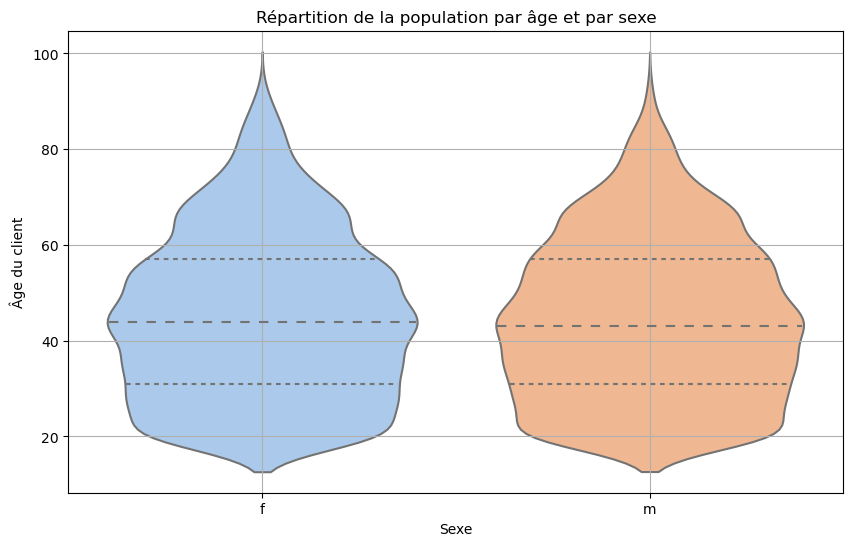

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='age du client en 2023', data=data_cust, inner='quartile', palette='pastel')
plt.title("Répartition de la population par âge et par sexe")
plt.xlabel("Sexe")
plt.ylabel("Âge du client")
plt.grid(True)
plt.show()
#représentation de la répartition de l'âge chez la population de client via un diagramme violin

## <a name="C3">Fichier produits</a>

In [19]:
data_prod.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [20]:
data_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [21]:
print(data_prod.isnull().sum())
#vérification des valeurs nulles

id_prod    0
price      0
categ      0
dtype: int64


In [22]:
data_prod.loc[data_prod['id_prod'].duplicated(keep=False),:]
#id_prod unique et non null donc confirmation clé primaire 

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [23]:
data_prod.sort_values(by = 'id_prod', ascending = True)

id_prod   price  categ
1001     0_0    3.75      0
803      0_1   10.99      0
2691    0_10   17.95      0
663    0_100   20.60      0
922   0_1000    6.84      0
...      ...     ...    ...
2576    2_96   47.91      2
2698    2_97  160.99      2
3088    2_98  149.74      2
3188    2_99   84.99      2
731      T_0   -1.00      0

[3287 rows x 3 columns]

In [24]:
data_prod.loc[data_prod['id_prod'].str.contains("T") == True, :]

id_prod  price  categ
731     T_0   -1.0      0

In [25]:
data_prod.drop([731], axis=0, inplace=True)

In [26]:
data_prod.loc[(data_prod['id_prod'].str.contains("0_")) & (data_prod['categ'] != 0), :]
#vérification que chaque id_produit commence par sa categorie

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [27]:
data_prod.loc[(data_prod['id_prod'].str.contains("1_")) & (data_prod['categ'] != 1), :]

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [28]:
data_prod.loc[(data_prod['id_prod'].str.contains("2_")) & (data_prod['categ'] != 2), :]

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

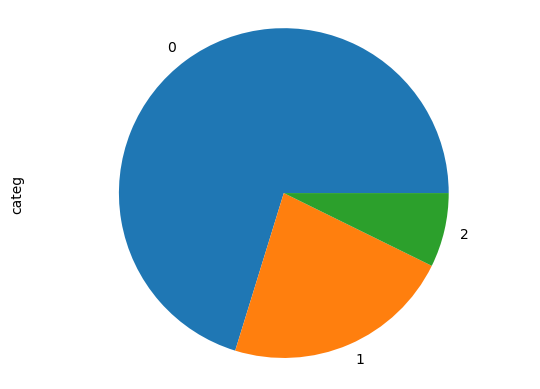

In [29]:
data_prod["categ"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

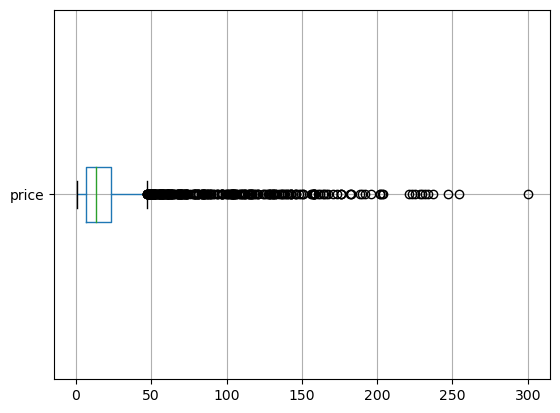

In [30]:
data_prod.boxplot(column="price", vert=False)
plt.show()

In [31]:
price_prod = data_prod.loc[: , ['price']]
display(price_prod)

price
0      19.99
1       5.13
2      17.99
3       4.99
4       3.99
...      ...
3282  115.99
3283   17.14
3284   11.22
3285   38.56
3286   25.16

[3286 rows x 1 columns]

In [32]:
q1=price_prod.quantile(.25, axis = 0) 
q2=price_prod.quantile(.5, axis = 0)
q3=price_prod.quantile(.75, axis = 0) 
print("1er (25%) Quantile:\n"+str(q1))
print("\n2eme (50%) Quantile:\n"+str(q2))
print("\n3eme (75%) Quantile:\n"+str(q3))
icq=q3-q1
print("\nEcart Inter Quantile:\n"+str(icq))
#méthode de l'écart inter-quartile
icq_applied= round(icq[0],2)
print("Outlier pour la colonne prix")
print("L'écart inter-quartile des prix est",icq_applied)
ub= round(q3[0]+(1.5*icq_applied),2)
print('Considéré comme outlier tout prix au-dessus de', ub)
#détermination du palier des outliers 

1er (25%) Quantile:
price    6.99
Name: 0.25, dtype: float64

2eme (50%) Quantile:
price    13.075
Name: 0.5, dtype: float64

3eme (75%) Quantile:
price    22.99
Name: 0.75, dtype: float64

Ecart Inter Quantile:
price    16.0
dtype: float64
Outlier pour la colonne prix
L'écart inter-quartile des prix est 16.0
Considéré comme outlier tout prix au-dessus de 46.99


In [33]:
data_prod.loc[data_prod['id_prod'].duplicated(keep=False),:]
#vérification des doublons sur id_prod
#id_prod non nul confirme la clé primaire

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [34]:
data_prod.describe()

price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000

In [35]:
price_cat = data_prod.loc[: , ['price','categ']]
display(price_cat)

price  categ
0      19.99      0
1       5.13      0
2      17.99      0
3       4.99      1
4       3.99      0
...      ...    ...
3282  115.99      2
3283   17.14      0
3284   11.22      0
3285   38.56      1
3286   25.16      0

[3286 rows x 2 columns]

In [36]:
price_cat.groupby('categ').mean()
#moyenne des prix de chaque catégorie

price
categ            
0       11.732795
1       25.531421
2      108.354686

## <a name="C4">Fichier transactions</a>

In [37]:
data_trans.head()

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

In [38]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [39]:
print(data_trans.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [40]:
data_trans.describe()
# 3267 id_prod contre 3287 dans la table produit

id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488

In [41]:
data_trans.loc[data_trans['date'].str.contains("test"), :]
#détermination du produit test 

id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]

In [42]:
data_trans.drop(data_trans[data_trans['date'].str.contains("test")].index, inplace=True)
#suppression du produit test 

In [43]:
data_trans.loc[data_trans['date'].str.contains("test"), :]
#verification de la suppression 

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []

In [44]:
data_trans['date'] = pd.to_datetime(data_trans['date'])
#conversion du type de variable de la colonne date 

In [45]:
data_trans.isna().sum()
#conversion sans effectif null

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [46]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [47]:
data_trans["jour_nom"] = data_trans["date"].dt.day_name()
data_trans["jour"] = data_trans["date"].dt.day
data_trans["mois_nom"] = data_trans["date"].dt.month_name()
data_trans["mois"] = data_trans["date"].dt.month
data_trans["annee"] = data_trans["date"].dt.year
data_trans["heure"] = data_trans["date"].dt.hour
data_trans["min"] = data_trans["date"].dt.minute

data_trans.head()
#colonne jour, mois, année, heure et minute 

id_prod                       date session_id client_id   jour_nom  jour  \
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103     Friday    20   
1   1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  Wednesday     2   
2  0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714   Saturday    18   
3   2_209 2021-06-24 04:19:29.835891    s_52962    c_6941   Thursday    24   
4  0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  Wednesday    11   

   mois_nom  mois  annee  heure  min  
0       May     5   2022     13   21  
1  February     2   2022      7   55  
2      June     6   2022     15   44  
3      June     6   2021      4   19  
4   January     1   2023      8   22

In [48]:
data_trans["date"].nunique()

679332

In [49]:
ds = data_trans.sort_values(by = ['session_id', 'date'], ascending = False)
ds.head(20)
#trier par deux valeurs session'id e date puis faire la diff moyenne d'une session

id_prod                       date session_id client_id jour_nom  jour  \
599185  0_1604 2021-10-04 19:00:20.030388    s_99998    c_2795   Monday     4   
48865   0_1411 2021-10-04 18:50:59.099942    s_99998    c_2795   Monday     4   
633558  0_1572 2021-10-04 18:45:54.374885    s_99998    c_2795   Monday     4   
504526  0_1197 2021-10-04 18:45:38.003516    s_99997    c_3521   Monday     4   
508968  0_1362 2021-10-04 18:58:49.228317    s_99996    c_4900   Monday     4   
218613  0_1475 2021-10-04 18:45:05.640783    s_99996    c_4900   Monday     4   
671163  0_1609 2021-10-04 18:39:10.485474    s_99996    c_4900   Monday     4   
85724   0_2231 2021-10-04 18:38:36.333661    s_99996    c_4900   Monday     4   
541544  0_1784 2021-10-04 18:35:32.201073    s_99995    c_4170   Monday     4   
306005  0_1636 2021-10-04 18:56:23.112236    s_99994    c_7685   Monday     4   
312476  0_1407 2021-10-04 18:40:10.702738    s_99994    c_7685   Monday     4   
67679   0_2060 2021-10-04 18:34:24.208113    s_99994    c_7685   Monday     4   
346420  0_1434 2021-10-04 18:32:25.964328    s_99993    c_4088   Monday     4   
275466  0_1527 2021-10-04 18:29:49.024816    s_99992      c_24   Monday     4   
458260  0_1353 2021-10-04 18:25:08.832179    s_99991     c_664   Monday     4   
517995  0_1072 2021-10-04 18:31:38.937103    s_99990    c_1609   Monday     4   
464684  0_1446 2021-10-04 18:30:14.040803    s_99990    c_1609   Monday     4   
115643  0_1688 2021-03-22 18:27:20.541991     s_9999    c_3239   Monday    22   
386703  0_1384 2021-03-22 18:13:44.104125     s_9999    c_3239   Monday    22   
257932  0_1580 2021-03-22 17:44:25.888687     s_9999    c_3239   Monday    22   

       mois_nom  mois  annee  heure  min  
599185  October    10   2021     19    0  
48865   October    10   2021     18   50  
633558  October    10   2021     18   45  
504526  October    10   2021     18   45  
508968  October    10   2021     18   58  
218613  October    10   2021     18   45  
671163  October    10   2021     18   39  
85724   October    10   2021     18   38  
541544  October    10   2021     18   35  
306005  October    10   2021     18   56  
312476  October    10   2021     18   40  
67679   October    10   2021     18   34  
346420  October    10   2021     18   32  
275466  October    10   2021     18   29  
458260  October    10   2021     18   25  
517995  October    10   2021     18   31  
464684  October    10   2021     18   30  
115643    March     3   2021     18   27  
386703    March     3   2021     18   13  
257932    March     3   2021     17   44

In [50]:
ds = ds.sort_values(by=['session_id', 'date'])
ds['temps_par_session'] = ds.groupby('session_id')['date'].diff().dt.total_seconds()
temps_moyen_par_session_sec = ds['temps_par_session'].mean()


temps_moyen_par_session_hr = temps_moyen_par_session_sec // 3600
temps_moyen_par_session_min = (temps_moyen_par_session_sec % 3600) // 60
temps_moyen_par_session_sec = temps_moyen_par_session_sec % 60

print(f"Temps moyen par session d'achat : {temps_moyen_par_session_hr:.0f} heures, {temps_moyen_par_session_min:.0f}minutes")

Temps moyen par session d'achat : 0 heures, 13minutes


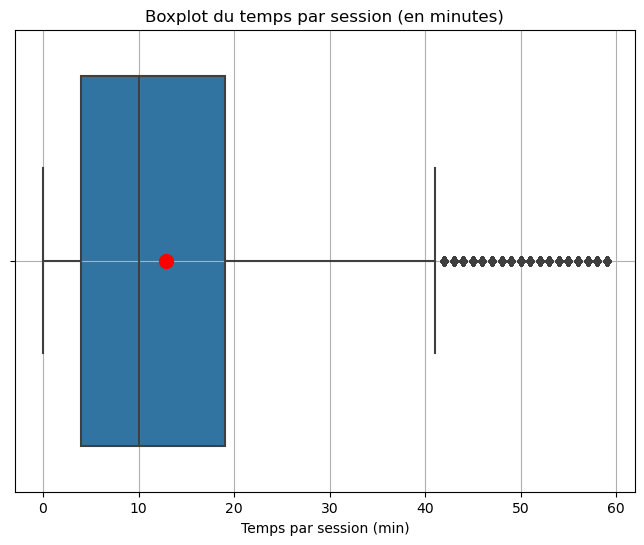

In [51]:
ds['temps_par_session_min'] = (ds["temps_par_session"] % 3600) // 60
ds_1 = ds[["client_id","temps_par_session_min"]]
ds_1 = ds_1.dropna(subset=['temps_par_session_min'])
mean_1 = ds_1['temps_par_session_min'].mean()


plt.figure(figsize=(8, 6))
sns.boxplot(data=ds_1, x='temps_par_session_min')
plt.title('Boxplot du temps par session (en minutes)')
plt.xlabel('Temps par session (min)')
plt.ylabel('')
plt.scatter(mean_1, 0, color='r', s=100, zorder=5)
plt.legend
plt.grid(True)
plt.show()

In [52]:
data_trans.loc[data_trans['id_prod'].duplicated(keep=False),:]

id_prod                       date session_id client_id   jour_nom  \
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103     Friday   
1        1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  Wednesday   
2       0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714   Saturday   
3        2_209 2021-06-24 04:19:29.835891    s_52962    c_6941   Thursday   
4       0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  Wednesday   
...        ...                        ...        ...       ...        ...   
679527  0_1551 2022-01-15 13:05:06.246925   s_150195    c_8489   Saturday   
679528   1_639 2022-03-19 16:03:23.429229   s_181434    c_4370   Saturday   
679529  0_1425 2022-12-20 04:33:37.584749   s_314704     c_304    Tuesday   
679530  0_1994 2021-07-16 20:36:35.350579    s_63204    c_2227     Friday   
679531   1_523 2022-09-28 01:12:01.973763   s_274568    c_3873  Wednesday   

        jour   mois_nom  mois  annee  heure  min  
0         20        May     5   2022     13   21  
1          2   February     2   2022      7   55  
2         18       June     6   2022     15   44  
3         24       June     6   2021      4   19  
4         11    January     1   2023      8   22  
...      ...        ...   ...    ...    ...  ...  
679527    15    January     1   2022     13    5  
679528    19      March     3   2022     16    3  
679529    20   December    12   2022      4   33  
679530    16       July     7   2021     20   36  
679531    28  September     9   2022      1   12  

[679314 rows x 11 columns]

In [53]:
data_trans.loc[data_trans['id_prod'] == '0_1551', :]

id_prod                       date session_id client_id  jour_nom  \
659     0_1551 2023-01-05 02:10:32.256751   s_322146    c_3358  Thursday   
1473    0_1551 2022-03-05 03:18:35.460532   s_174511    c_6184  Saturday   
2451    0_1551 2022-04-24 04:03:21.626205   s_198587      c_87    Sunday   
2782    0_1551 2022-12-26 11:15:14.547071   s_317553    c_1609    Monday   
3991    0_1551 2022-04-04 18:02:27.092686   s_189236    c_6601    Monday   
...        ...                        ...        ...       ...       ...   
673672  0_1551 2022-01-21 12:41:46.683827   s_153065    c_2168    Friday   
678092  0_1551 2021-04-25 00:50:26.460247    s_25308    c_5408    Sunday   
678147  0_1551 2022-03-10 15:00:37.519646   s_177172    c_5301  Thursday   
678768  0_1551 2022-01-07 01:12:37.162136   s_146077    c_1609    Friday   
679527  0_1551 2022-01-15 13:05:06.246925   s_150195    c_8489  Saturday   

        jour  mois_nom  mois  annee  heure  min  
659        5   January     1   2023      2   10  
1473       5     March     3   2022      3   18  
2451      24     April     4   2022      4    3  
2782      26  December    12   2022     11   15  
3991       4     April     4   2022     18    2  
...      ...       ...   ...    ...    ...  ...  
673672    21   January     1   2022     12   41  
678092    25     April     4   2021      0   50  
678147    10     March     3   2022     15    0  
678768     7   January     1   2022      1   12  
679527    15   January     1   2022     13    5  

[627 rows x 11 columns]

In [54]:
data_trans.loc[data_trans['session_id'].duplicated(keep=False),:]

id_prod                       date session_id client_id   jour_nom  \
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103     Friday   
1        1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  Wednesday   
2       0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714   Saturday   
4       0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  Wednesday   
5       0_1418 2022-10-20 15:59:16.084030   s_285425    c_1478   Thursday   
...        ...                        ...        ...       ...        ...   
679523   1_190 2022-01-30 06:17:15.265379   s_157285     c_656     Sunday   
679525  0_1434 2022-12-14 13:18:29.143723   s_311959    c_3653  Wednesday   
679529  0_1425 2022-12-20 04:33:37.584749   s_314704     c_304    Tuesday   
679530  0_1994 2021-07-16 20:36:35.350579    s_63204    c_2227     Friday   
679531   1_523 2022-09-28 01:12:01.973763   s_274568    c_3873  Wednesday   

        jour   mois_nom  mois  annee  heure  min  
0         20        May     5   2022     13   21  
1          2   February     2   2022      7   55  
2         18       June     6   2022     15   44  
4         11    January     1   2023      8   22  
5         20    October    10   2022     15   59  
...      ...        ...   ...    ...    ...  ...  
679523    30    January     1   2022      6   17  
679525    14   December    12   2022     13   18  
679529    20   December    12   2022      4   33  
679530    16       July     7   2021     20   36  
679531    28  September     9   2022      1   12  

[515982 rows x 11 columns]

In [55]:
data_trans.loc[data_trans['session_id'] == 's_157285',:]

id_prod                       date session_id client_id jour_nom  jour  \
616230  0_1974 2022-01-30 06:41:19.378025   s_157285     c_656   Sunday    30   
679315  0_1438 2022-01-30 06:20:26.323340   s_157285     c_656   Sunday    30   
679523   1_190 2022-01-30 06:17:15.265379   s_157285     c_656   Sunday    30   

       mois_nom  mois  annee  heure  min  
616230  January     1   2022      6   41  
679315  January     1   2022      6   20  
679523  January     1   2022      6   17

In [56]:
data_trans.loc[data_trans['client_id'].duplicated(keep=False),:]
#vérifications des doublons sur client_id

id_prod                       date session_id client_id   jour_nom  \
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103     Friday   
1        1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  Wednesday   
2       0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714   Saturday   
3        2_209 2021-06-24 04:19:29.835891    s_52962    c_6941   Thursday   
4       0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  Wednesday   
...        ...                        ...        ...       ...        ...   
679527  0_1551 2022-01-15 13:05:06.246925   s_150195    c_8489   Saturday   
679528   1_639 2022-03-19 16:03:23.429229   s_181434    c_4370   Saturday   
679529  0_1425 2022-12-20 04:33:37.584749   s_314704     c_304    Tuesday   
679530  0_1994 2021-07-16 20:36:35.350579    s_63204    c_2227     Friday   
679531   1_523 2022-09-28 01:12:01.973763   s_274568    c_3873  Wednesday   

        jour   mois_nom  mois  annee  heure  min  
0         20        May     5   2022     13   21  
1          2   February     2   2022      7   55  
2         18       June     6   2022     15   44  
3         24       June     6   2021      4   19  
4         11    January     1   2023      8   22  
...      ...        ...   ...    ...    ...  ...  
679527    15    January     1   2022     13    5  
679528    19      March     3   2022     16    3  
679529    20   December    12   2022      4   33  
679530    16       July     7   2021     20   36  
679531    28  September     9   2022      1   12  

[679324 rows x 11 columns]

In [57]:
agg_c = data_trans.groupby('client_id').count()
display(agg_c)
#compte des occurences par client_id
# 8602 contre 8623 sur le fichier client, 21 client_id absents du fichier transacs donc clients inactifs 

id_prod  date  session_id  jour_nom  jour  mois_nom  mois  annee  \
client_id                                                                     
c_1             39    39          39        39    39        39    39     39   
c_10            58    58          58        58    58        58    58     58   
c_100            8     8           8         8     8         8     8      8   
c_1000         125   125         125       125   125       125   125    125   
c_1001         102   102         102       102   102       102   102    102   
...            ...   ...         ...       ...   ...       ...   ...    ...   
c_995           14    14          14        14    14        14    14     14   
c_996           95    95          95        95    95        95    95     95   
c_997           59    59          59        59    59        59    59     59   
c_998           53    53          53        53    53        53    53     53   
c_999           46    46          46        46    46        46    46     46   

           heure  min  
client_id              
c_1           39   39  
c_10          58   58  
c_100          8    8  
c_1000       125  125  
c_1001       102  102  
...          ...  ...  
c_995         14   14  
c_996         95   95  
c_997         59   59  
c_998         53   53  
c_999         46   46  

[8600 rows x 10 columns]

In [58]:
agg_p = data_trans.groupby('id_prod').count()
top_prod = agg_p.sort_values(by = 'session_id', ascending = False)
top_prod = top_prod[['session_id']]
top_prod.rename(columns={'session_id': 'nombre de vente produit'}, inplace=True)
top_prod.head(10)
#top produit vendu

nombre de vente produit
id_prod                         
1_369                       2252
1_417                       2189
1_414                       2180
1_498                       2128
1_425                       2096
1_403                       1960
1_412                       1951
1_413                       1945
1_406                       1939
1_407                       1935

In [59]:
flop_prod = agg_p.sort_values(by = 'session_id')
flop_prod = flop_prod[['session_id']]
flop_prod.rename(columns={'session_id': 'nombre de vente produit'}, inplace=True)
flop_prod.head(20)

nombre de vente produit
id_prod                         
0_549                          1
0_2201                         1
2_23                           1
0_1284                         1
0_1683                         1
0_833                          1
2_98                           1
0_1633                         1
0_1601                         1
2_81                           1
0_807                          1
0_541                          1
0_1151                         1
0_886                          1
0_1539                         1
0_1379                         1
0_1728                         1
0_1498                         1
0_88                           2
0_1803                         2

In [60]:
prod_t = pd.merge(agg_p, data_prod, on='id_prod', how='outer')
display(prod_t)

id_prod    date  session_id  client_id  jour_nom    jour  mois_nom  \
0        0_0  1242.0      1242.0     1242.0    1242.0  1242.0    1242.0   
1        0_1   487.0       487.0      487.0     487.0   487.0     487.0   
2       0_10    22.0        22.0       22.0      22.0    22.0      22.0   
3      0_100     3.0         3.0        3.0       3.0     3.0       3.0   
4     0_1000   432.0       432.0      432.0     432.0   432.0     432.0   
...      ...     ...         ...        ...       ...     ...       ...   
3282  0_1624     NaN         NaN        NaN       NaN     NaN       NaN   
3283    2_86     NaN         NaN        NaN       NaN     NaN       NaN   
3284   0_299     NaN         NaN        NaN       NaN     NaN       NaN   
3285   0_510     NaN         NaN        NaN       NaN     NaN       NaN   
3286  0_2308     NaN         NaN        NaN       NaN     NaN       NaN   

        mois   annee   heure     min   price  categ  
0     1242.0  1242.0  1242.0  1242.0    3.75    0.0  
1      487.0   487.0   487.0   487.0   10.99    0.0  
2       22.0    22.0    22.0    22.0   17.95    0.0  
3        3.0     3.0     3.0     3.0   20.60    0.0  
4      432.0   432.0   432.0   432.0    6.84    0.0  
...      ...     ...     ...     ...     ...    ...  
3282     NaN     NaN     NaN     NaN   24.50    0.0  
3283     NaN     NaN     NaN     NaN  132.36    2.0  
3284     NaN     NaN     NaN     NaN   22.99    0.0  
3285     NaN     NaN     NaN     NaN   23.66    0.0  
3286     NaN     NaN     NaN     NaN   20.28    0.0  

[3287 rows x 13 columns]

In [61]:
prod_t.isna().sum()

id_prod        0
date          21
session_id    21
client_id     21
jour_nom      21
jour          21
mois_nom      21
mois          21
annee         21
heure         21
min           21
price          1
categ          1
dtype: int64

In [62]:
agg_c.describe()

id_prod          date    session_id      jour_nom          jour  \
count   8600.000000   8600.000000   8600.000000   8600.000000   8600.000000   
mean      78.992093     78.992093     78.992093     78.992093     78.992093   
std      312.437204    312.437204    312.437204    312.437204    312.437204   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       27.000000     27.000000     27.000000     27.000000     27.000000   
50%       51.000000     51.000000     51.000000     51.000000     51.000000   
75%       96.000000     96.000000     96.000000     96.000000     96.000000   
max    25488.000000  25488.000000  25488.000000  25488.000000  25488.000000   

           mois_nom          mois         annee         heure           min  
count   8600.000000   8600.000000   8600.000000   8600.000000   8600.000000  
mean      78.992093     78.992093     78.992093     78.992093     78.992093  
std      312.437204    312.437204    312.437204    312.437204    312.437204  
min        1.000000      1.000000      1.000000      1.000000      1.000000  
25%       27.000000     27.000000     27.000000     27.000000     27.000000  
50%       51.000000     51.000000     51.000000     51.000000     51.000000  
75%       96.000000     96.000000     96.000000     96.000000     96.000000  
max    25488.000000  25488.000000  25488.000000  25488.000000  25488.000000

In [63]:
desc_agg = agg_c.sort_values(by = 'session_id', ascending = False)
desc_agg.head(20)
#client avec le plus de transactions

id_prod   date  session_id  jour_nom   jour  mois_nom   mois  \
client_id                                                                 
c_1609       25488  25488       25488     25488  25488     25488  25488   
c_6714        9187   9187        9187      9187   9187      9187   9187   
c_3454        6773   6773        6773      6773   6773      6773   6773   
c_4958        5195   5195        5195      5195   5195      5195   5195   
c_3263         403    403         403       403    403       403    403   
c_2140         402    402         402       402    402       402    402   
c_2595         398    398         398       398    398       398    398   
c_2077         384    384         384       384    384       384    384   
c_1637         380    380         380       380    380       380    380   
c_7421         379    379         379       379    379       379    379   
c_8026         377    377         377       377    377       377    377   
c_760          375    375         375       375    375       375    375   
c_1422         374    374         374       374    374       374    374   
c_5953         374    374         374       374    374       374    374   
c_8510         373    373         373       373    373       373    373   
c_7319         371    371         371       371    371       371    371   
c_1570         369    369         369       369    369       369    369   
c_8556         369    369         369       369    369       369    369   
c_7959         369    369         369       369    369       369    369   
c_632          368    368         368       368    368       368    368   

           annee  heure    min  
client_id                       
c_1609     25488  25488  25488  
c_6714      9187   9187   9187  
c_3454      6773   6773   6773  
c_4958      5195   5195   5195  
c_3263       403    403    403  
c_2140       402    402    402  
c_2595       398    398    398  
c_2077       384    384    384  
c_1637       380    380    380  
c_7421       379    379    379  
c_8026       377    377    377  
c_760        375    375    375  
c_1422       374    374    374  
c_5953       374    374    374  
c_8510       373    373    373  
c_7319       371    371    371  
c_1570       369    369    369  
c_8556       369    369    369  
c_7959       369    369    369  
c_632        368    368    368

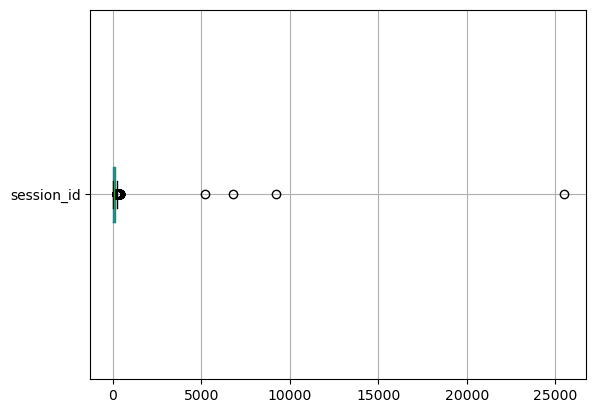

In [64]:
agg_c.boxplot(column="session_id", vert=False)
plt.show()

In [65]:
client_id = pd.merge(agg_c, data_cust, on='client_id',  how='outer')
#faire un merge avec le fichier client et trouver les 21 manquants 
display(client_id)

client_id  id_prod   date  session_id  jour_nom   jour  mois_nom   mois  \
0          c_1     39.0   39.0        39.0      39.0   39.0      39.0   39.0   
1         c_10     58.0   58.0        58.0      58.0   58.0      58.0   58.0   
2        c_100      8.0    8.0         8.0       8.0    8.0       8.0    8.0   
3       c_1000    125.0  125.0       125.0     125.0  125.0     125.0  125.0   
4       c_1001    102.0  102.0       102.0     102.0  102.0     102.0  102.0   
...        ...      ...    ...         ...       ...    ...       ...    ...   
8616     c_862      NaN    NaN         NaN       NaN    NaN       NaN    NaN   
8617    c_7584      NaN    NaN         NaN       NaN    NaN       NaN    NaN   
8618      c_90      NaN    NaN         NaN       NaN    NaN       NaN    NaN   
8619     c_587      NaN    NaN         NaN       NaN    NaN       NaN    NaN   
8620    c_3526      NaN    NaN         NaN       NaN    NaN       NaN    NaN   

      annee  heure    min sex  birth  age du client en 2023  
0      39.0   39.0   39.0   m   1955                     68  
1      58.0   58.0   58.0   m   1956                     67  
2       8.0    8.0    8.0   m   1992                     31  
3     125.0  125.0  125.0   f   1966                     57  
4     102.0  102.0  102.0   m   1982                     41  
...     ...    ...    ...  ..    ...                    ...  
8616    NaN    NaN    NaN   f   1956                     67  
8617    NaN    NaN    NaN   f   1960                     63  
8618    NaN    NaN    NaN   m   2001                     22  
8619    NaN    NaN    NaN   m   1993                     30  
8620    NaN    NaN    NaN   m   1956                     67  

[8621 rows x 14 columns]

In [66]:
client_out = client_id.loc[(client_id['client_id'].notnull()) & (client_id['id_prod'].isnull()) , :]
display(client_out)
#client inactifs

client_id  id_prod  date  session_id  jour_nom  jour  mois_nom  mois  \
8600    c_8253      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8601    c_3789      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8602    c_4406      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8603    c_2706      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8604    c_3443      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8605    c_4447      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8606    c_3017      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8607    c_4086      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8608    c_6930      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8609    c_4358      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8610    c_8381      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8611    c_1223      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8612    c_6862      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8613    c_5245      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8614    c_5223      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8615    c_6735      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8616     c_862      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8617    c_7584      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8618      c_90      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8619     c_587      NaN   NaN         NaN       NaN   NaN       NaN   NaN   
8620    c_3526      NaN   NaN         NaN       NaN   NaN       NaN   NaN   

      annee  heure  min sex  birth  age du client en 2023  
8600    NaN    NaN  NaN   f   2001                     22  
8601    NaN    NaN  NaN   f   1997                     26  
8602    NaN    NaN  NaN   f   1998                     25  
8603    NaN    NaN  NaN   f   1967                     56  
8604    NaN    NaN  NaN   m   1959                     64  
8605    NaN    NaN  NaN   m   1956                     67  
8606    NaN    NaN  NaN   f   1992                     31  
8607    NaN    NaN  NaN   f   1992                     31  
8608    NaN    NaN  NaN   m   2004                     19  
8609    NaN    NaN  NaN   m   1999                     24  
8610    NaN    NaN  NaN   f   1965                     58  
8611    NaN    NaN  NaN   m   1963                     60  
8612    NaN    NaN  NaN   f   2002                     21  
8613    NaN    NaN  NaN   f   2004                     19  
8614    NaN    NaN  NaN   m   2003                     20  
8615    NaN    NaN  NaN   m   2004                     19  
8616    NaN    NaN  NaN   f   1956                     67  
8617    NaN    NaN  NaN   f   1960                     63  
8618    NaN    NaN  NaN   m   2001                     22  
8619    NaN    NaN  NaN   m   1993                     30  
8620    NaN    NaN  NaN   m   1956                     67

In [67]:
client_out['client_id'].count()

21

In [68]:
pourc_out = round((client_out['client_id'].count()/client_id['client_id'].count())*100,2)
print("Le pourcentage des clients inactifs s'élève à",pourc_out,"%.")

Le pourcentage des clients inactifs s'élève à 0.24 %.


## Fichier Analyse 

In [69]:
analyse_1 = pd.merge(data_cust, data_trans, on=['client_id'], how='outer')
analyse_glo = pd.merge(analyse_1, data_prod, on=['id_prod'], how='outer')
analyse_glo["age de l'acheteur"]  = analyse_glo["annee"] - analyse_glo["birth"]
display(analyse_glo)

client_id  sex   birth  age du client en 2023 id_prod  \
0         c_4410    f  1967.0                   56.0  0_1316   
1         c_4410    f  1967.0                   56.0  0_1316   
2         c_4410    f  1967.0                   56.0  0_1316   
3         c_3654    f  1978.0                   45.0  0_1316   
4         c_3654    f  1978.0                   45.0  0_1316   
...          ...  ...     ...                    ...     ...   
679369       NaN  NaN     NaN                    NaN  0_1624   
679370       NaN  NaN     NaN                    NaN    2_86   
679371       NaN  NaN     NaN                    NaN   0_299   
679372       NaN  NaN     NaN                    NaN   0_510   
679373       NaN  NaN     NaN                    NaN  0_2308   

                             date session_id   jour_nom  jour  mois_nom  mois  \
0      2021-12-29 09:11:18.860592   s_141762  Wednesday  29.0  December  12.0   
1      2022-03-29 09:11:18.860592   s_186233    Tuesday  29.0     March   3.0   
2      2022-05-29 09:11:18.860592   s_215758     Sunday  29.0       May   5.0   
3      2021-11-26 03:51:34.068872   s_125143     Friday  26.0  November  11.0   
4      2022-08-26 03:51:34.068872   s_258546     Friday  26.0    August   8.0   
...                           ...        ...        ...   ...       ...   ...   
679369                        NaT        NaN        NaN   NaN       NaN   NaN   
679370                        NaT        NaN        NaN   NaN       NaN   NaN   
679371                        NaT        NaN        NaN   NaN       NaN   NaN   
679372                        NaT        NaN        NaN   NaN       NaN   NaN   
679373                        NaT        NaN        NaN   NaN       NaN   NaN   

         annee  heure   min   price  categ  age de l'acheteur  
0       2021.0    9.0  11.0    7.20    0.0               54.0  
1       2022.0    9.0  11.0    7.20    0.0               55.0  
2       2022.0    9.0  11.0    7.20    0.0               55.0  
3       2021.0    3.0  51.0    7.20    0.0               43.0  
4       2022.0    3.0  51.0    7.20    0.0               44.0  
...        ...    ...   ...     ...    ...                ...  
679369     NaN    NaN   NaN   24.50    0.0                NaN  
679370     NaN    NaN   NaN  132.36    2.0                NaN  
679371     NaN    NaN   NaN   22.99    0.0                NaN  
679372     NaN    NaN   NaN   23.66    0.0                NaN  
679373     NaN    NaN   NaN   20.28    0.0                NaN  

[679374 rows x 17 columns]

In [70]:
analyse_glo.isna().sum()

client_id                 21
sex                       21
birth                     21
age du client en 2023     21
id_prod                   21
date                      42
session_id                42
jour_nom                  42
jour                      42
mois_nom                  42
mois                      42
annee                     42
heure                     42
min                       42
price                    242
categ                    242
age de l'acheteur         42
dtype: int64

In [71]:
analyse_glo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679374 entries, 0 to 679373
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   client_id              679353 non-null  object        
 1   sex                    679353 non-null  object        
 2   birth                  679353 non-null  float64       
 3   age du client en 2023  679353 non-null  float64       
 4   id_prod                679353 non-null  object        
 5   date                   679332 non-null  datetime64[ns]
 6   session_id             679332 non-null  object        
 7   jour_nom               679332 non-null  object        
 8   jour                   679332 non-null  float64       
 9   mois_nom               679332 non-null  object        
 10  mois                   679332 non-null  float64       
 11  annee                  679332 non-null  float64       
 12  heure                  679332 non-null  floa

In [72]:
prod_out = analyse_glo.loc[(analyse_glo['id_prod'].notnull())&(analyse_glo['session_id'].isnull())]
display(prod_out)

client_id  sex  birth  age du client en 2023 id_prod date session_id  \
679353       NaN  NaN    NaN                    NaN  0_1016  NaT        NaN   
679354       NaN  NaN    NaN                    NaN  0_1780  NaT        NaN   
679355       NaN  NaN    NaN                    NaN  0_1062  NaT        NaN   
679356       NaN  NaN    NaN                    NaN  0_1119  NaT        NaN   
679357       NaN  NaN    NaN                    NaN  0_1014  NaT        NaN   
679358       NaN  NaN    NaN                    NaN     1_0  NaT        NaN   
679359       NaN  NaN    NaN                    NaN  0_1318  NaT        NaN   
679360       NaN  NaN    NaN                    NaN  0_1800  NaT        NaN   
679361       NaN  NaN    NaN                    NaN  0_1645  NaT        NaN   
679362       NaN  NaN    NaN                    NaN   0_322  NaT        NaN   
679363       NaN  NaN    NaN                    NaN  0_1620  NaT        NaN   
679364       NaN  NaN    NaN                    NaN  0_1025  NaT        NaN   
679365       NaN  NaN    NaN                    NaN    2_87  NaT        NaN   
679366       NaN  NaN    NaN                    NaN   1_394  NaT        NaN   
679367       NaN  NaN    NaN                    NaN    2_72  NaT        NaN   
679368       NaN  NaN    NaN                    NaN   0_310  NaT        NaN   
679369       NaN  NaN    NaN                    NaN  0_1624  NaT        NaN   
679370       NaN  NaN    NaN                    NaN    2_86  NaT        NaN   
679371       NaN  NaN    NaN                    NaN   0_299  NaT        NaN   
679372       NaN  NaN    NaN                    NaN   0_510  NaT        NaN   
679373       NaN  NaN    NaN                    NaN  0_2308  NaT        NaN   

       jour_nom  jour mois_nom  mois  annee  heure  min   price  categ  \
679353      NaN   NaN      NaN   NaN    NaN    NaN  NaN   35.06    0.0   
679354      NaN   NaN      NaN   NaN    NaN    NaN  NaN    1.67    0.0   
679355      NaN   NaN      NaN   NaN    NaN    NaN  NaN   20.08    0.0   
679356      NaN   NaN      NaN   NaN    NaN    NaN  NaN    2.99    0.0   
679357      NaN   NaN      NaN   NaN    NaN    NaN  NaN    1.15    0.0   
679358      NaN   NaN      NaN   NaN    NaN    NaN  NaN   31.82    1.0   
679359      NaN   NaN      NaN   NaN    NaN    NaN  NaN   20.92    0.0   
679360      NaN   NaN      NaN   NaN    NaN    NaN  NaN   22.05    0.0   
679361      NaN   NaN      NaN   NaN    NaN    NaN  NaN    2.99    0.0   
679362      NaN   NaN      NaN   NaN    NaN    NaN  NaN    2.99    0.0   
679363      NaN   NaN      NaN   NaN    NaN    NaN  NaN    0.80    0.0   
679364      NaN   NaN      NaN   NaN    NaN    NaN  NaN   24.99    0.0   
679365      NaN   NaN      NaN   NaN    NaN    NaN  NaN  220.99    2.0   
679366      NaN   NaN      NaN   NaN    NaN    NaN  NaN   39.73    1.0   
679367      NaN   NaN      NaN   NaN    NaN    NaN  NaN  141.32    2.0   
679368      NaN   NaN      NaN   NaN    NaN    NaN  NaN    1.94    0.0   
679369      NaN   NaN      NaN   NaN    NaN    NaN  NaN   24.50    0.0   
679370      NaN   NaN      NaN   NaN    NaN    NaN  NaN  132.36    2.0   
679371      NaN   NaN      NaN   NaN    NaN    NaN  NaN   22.99    0.0   
679372      NaN   NaN      NaN   NaN    NaN    NaN  NaN   23.66    0.0   
679373      NaN   NaN      NaN   NaN    NaN    NaN  NaN   20.28    0.0   

        age de l'acheteur  
679353                NaN  
679354                NaN  
679355                NaN  
679356                NaN  
679357                NaN  
679358                NaN  
679359                NaN  
679360                NaN  
679361                NaN  
679362                NaN  
679363                NaN  
679364                NaN  
679365                NaN  
679366                NaN  
679367                NaN  
679368                NaN  
679369                NaN  
679370                NaN  
679371                NaN  
679372                NaN  
679373                NaN

In [73]:
prod_out.loc[prod_out['id_prod'].duplicated(keep=False),:]

Empty DataFrame
Columns: [client_id, sex, birth, age du client en 2023, id_prod, date, session_id, jour_nom, jour, mois_nom, mois, annee, heure, min, price, categ, age de l'acheteur]
Index: []

In [74]:
pour_outp = round((prod_out['id_prod'].count()/data_prod['id_prod'].count())*100,2)
prod_1 = prod_out['id_prod'].count()
print("Le pourcentage des produits non vendus s'élève à " ,pour_outp, "%")
print("ce qui équivaut à ", prod_1)

Le pourcentage des produits non vendus s'élève à  0.64 %
ce qui équivaut à  21


In [75]:
analyse_glo.loc[analyse_glo['price'].isnull()]

client_id sex   birth  age du client en 2023 id_prod  \
542051    c_4505   m  1976.0                   47.0  0_2245   
542052    c_4505   m  1976.0                   47.0  0_2245   
542053    c_3468   f  1981.0                   42.0  0_2245   
542054    c_3468   f  1981.0                   42.0  0_2245   
542055    c_1403   f  1978.0                   45.0  0_2245   
...          ...  ..     ...                    ...     ...   
668010     c_862   f  1956.0                   67.0     NaN   
668011    c_7584   f  1960.0                   63.0     NaN   
668012      c_90   m  2001.0                   22.0     NaN   
668013     c_587   m  1993.0                   30.0     NaN   
668014    c_3526   m  1956.0                   67.0     NaN   

                             date session_id   jour_nom  jour   mois_nom  \
542051 2022-01-09 09:23:31.000720   s_147220     Sunday   9.0    January   
542052 2022-11-09 09:23:31.000720   s_295013  Wednesday   9.0   November   
542053 2021-09-11 10:52:05.205583    s_88251   Saturday  11.0  September   
542054 2022-05-11 10:52:05.205583   s_206902  Wednesday  11.0        May   
542055 2022-09-15 14:26:50.187952   s_268455   Thursday  15.0  September   
...                           ...        ...        ...   ...        ...   
668010                        NaT        NaN        NaN   NaN        NaN   
668011                        NaT        NaN        NaN   NaN        NaN   
668012                        NaT        NaN        NaN   NaN        NaN   
668013                        NaT        NaN        NaN   NaN        NaN   
668014                        NaT        NaN        NaN   NaN        NaN   

        mois   annee  heure   min  price  categ  age de l'acheteur  
542051   1.0  2022.0    9.0  23.0    NaN    NaN               46.0  
542052  11.0  2022.0    9.0  23.0    NaN    NaN               46.0  
542053   9.0  2021.0   10.0  52.0    NaN    NaN               40.0  
542054   5.0  2022.0   10.0  52.0    NaN    NaN               41.0  
542055   9.0  2022.0   14.0  26.0    NaN    NaN               44.0  
...      ...     ...    ...   ...    ...    ...                ...  
668010   NaN     NaN    NaN   NaN    NaN    NaN                NaN  
668011   NaN     NaN    NaN   NaN    NaN    NaN                NaN  
668012   NaN     NaN    NaN   NaN    NaN    NaN                NaN  
668013   NaN     NaN    NaN   NaN    NaN    NaN                NaN  
668014   NaN     NaN    NaN   NaN    NaN    NaN                NaN  

[242 rows x 17 columns]

In [76]:
data_prod.loc[data_prod['id_prod'] == '0_2245',]
#la fiche produit 2245 de la categorie n'est pas renseigné 

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [77]:
analyse_f = analyse_glo.loc[(analyse_glo["client_id"].notnull())&(analyse_glo["date"].notnull())&(analyse_glo["price"].notnull())]
analyse_f.isna().sum()

client_id                0
sex                      0
birth                    0
age du client en 2023    0
id_prod                  0
date                     0
session_id               0
jour_nom                 0
jour                     0
mois_nom                 0
mois                     0
annee                    0
heure                    0
min                      0
price                    0
categ                    0
age de l'acheteur        0
dtype: int64

In [78]:
analyse_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679352
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   client_id              679111 non-null  object        
 1   sex                    679111 non-null  object        
 2   birth                  679111 non-null  float64       
 3   age du client en 2023  679111 non-null  float64       
 4   id_prod                679111 non-null  object        
 5   date                   679111 non-null  datetime64[ns]
 6   session_id             679111 non-null  object        
 7   jour_nom               679111 non-null  object        
 8   jour                   679111 non-null  float64       
 9   mois_nom               679111 non-null  object        
 10  mois                   679111 non-null  float64       
 11  annee                  679111 non-null  float64       
 12  heure                  679111 non-null  floa

### Analyse CA

In [79]:
CA_year = round(analyse_f.groupby(['annee','mois'], as_index=False).sum(),0)
CA_year.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "categ",], inplace = True)
CA_year.rename(columns = {'price': 'CA'}, inplace = True)
CA_year['classement_mois'] = CA_year.groupby('annee')['mois'].rank()
pd.set_option('display.max_rows', 10)
display(CA_year)

annee  mois      jour        CA  classement_mois
0   2021.0   3.0  455301.0  482441.0              1.0
1   2021.0   4.0  443903.0  476109.0              2.0
2   2021.0   5.0  452166.0  492943.0              3.0
3   2021.0   6.0  415841.0  484089.0              4.0
4   2021.0   7.0  390168.0  482835.0              5.0
..     ...   ...       ...       ...              ...
19  2022.0  10.0  463644.0  507918.0             10.0
20  2022.0  11.0  449122.0  496665.0             11.0
21  2022.0  12.0  449524.0  510220.0             12.0
22  2023.0   1.0  461858.0  517541.0              1.0
23  2023.0   2.0  377057.0  456680.0              2.0

[24 rows x 5 columns]

In [80]:
from datetime import datetime

def create_date(row):
    mois = int(row['mois'])
    annee = int(row['annee'])
    return datetime(year=annee, month=mois, day=1)

CA_year['mois_annee'] = CA_year.apply(create_date, axis=1)
display(CA_year)

annee  mois      jour        CA  classement_mois mois_annee
0   2021.0   3.0  455301.0  482441.0              1.0 2021-03-01
1   2021.0   4.0  443903.0  476109.0              2.0 2021-04-01
2   2021.0   5.0  452166.0  492943.0              3.0 2021-05-01
3   2021.0   6.0  415841.0  484089.0              4.0 2021-06-01
4   2021.0   7.0  390168.0  482835.0              5.0 2021-07-01
..     ...   ...       ...       ...              ...        ...
19  2022.0  10.0  463644.0  507918.0             10.0 2022-10-01
20  2022.0  11.0  449122.0  496665.0             11.0 2022-11-01
21  2022.0  12.0  449524.0  510220.0             12.0 2022-12-01
22  2023.0   1.0  461858.0  517541.0              1.0 2023-01-01
23  2023.0   2.0  377057.0  456680.0              2.0 2023-02-01

[24 rows x 6 columns]

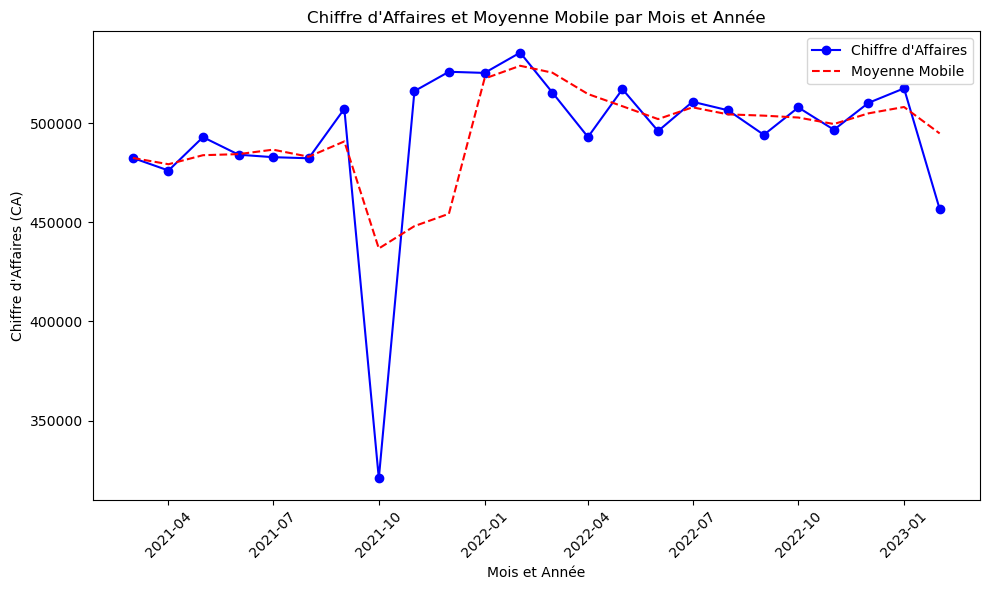

In [81]:
CA_year['moyenne_mobile'] = CA_year['CA'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(CA_year['mois_annee'], CA_year['CA'], marker='o', linestyle='-', color='b', label='Chiffre d\'Affaires')
plt.plot(CA_year['mois_annee'], CA_year['moyenne_mobile'], linestyle='--', color='r', label='Moyenne Mobile')
plt.xlabel('Mois et Année')
plt.ylabel('Chiffre d\'Affaires (CA)')
plt.title('Chiffre d\'Affaires et Moyenne Mobile par Mois et Année')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
Ana_prod = analyse_f.groupby(['id_prod'], as_index=False).sum()
Ana_prod.drop(columns = ["birth", "age du client en 2023", "heure", "min","annee","mois","min","categ","age de l'acheteur","jour"], inplace = True)
Ana_prod.sort_values(by = 'price', ascending = False)

id_prod     price
3096   2_159  94893.50
3070   2_135  69334.95
3045   2_112  65407.76
3034   2_102  60736.78
3152   2_209  56971.86
...      ...       ...
665   0_1601      1.99
2079   0_807      1.99
719   0_1653      1.98
313   0_1284      1.38
595   0_1539      0.99

[3265 rows x 2 columns]

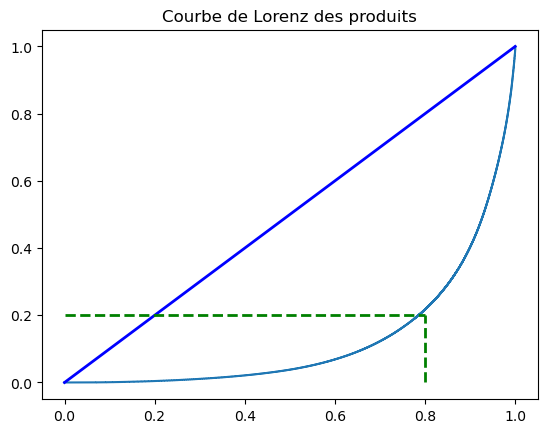

In [87]:
pop2 = Ana_prod['price'].values
n = len(pop2)
lorenz = np.cumsum(np.sort(pop2)) / pop2.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b-', lw=2) 
plt.plot([0.0, 0.80], [0.2, 0.2], 'g--', lw=2)
plt.plot([0.8, 0.80], [0.0, 0.2], 'g--', lw=2)
plt.title('Courbe de Lorenz des produits')
plt.show()

In [92]:
CA_tot = CA_year['CA'].sum()
print("Le CA total s'élève à ", CA_tot ," euros")

Le CA total s'élève à  11853732.0  euros


In [93]:
CA_categ = analyse_f.groupby(['annee','categ'], as_index=False).sum() 
CA_categ.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "mois", "jour"], inplace = True)
CA_categ.rename(columns = {'price': 'CA de la categorie'}, inplace = True)
display(CA_categ)

annee  categ  CA de la categorie
0  2021.0    0.0          1883020.45
1  2021.0    1.0          1777995.85
2  2021.0    2.0          1109810.26
3  2022.0    0.0          2192970.46
4  2022.0    1.0          2485275.19
5  2022.0    2.0          1430436.16
6  2023.0    0.0           343740.06
7  2023.0    1.0           390451.65
8  2023.0    2.0           240028.60

In [94]:
CA_21 = analyse_f.loc[analyse_f['annee'] == 2021]
CA_21.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "jour", "categ","annee"], inplace = True)
CA_21 = CA_21.groupby(['mois'], as_index=False).sum()
CA_21.sort_values(by = 'price', ascending = False)
display(CA_21)
#Octobre semble plus faible que les autres mois et absnece de deux mois (Janvier/février) pour analyse du CA

C:\Users\Théo\AppData\Local\Temp\ipykernel_3208\2297068030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_21.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "jour", "categ","annee"], inplace = True)


mois      price
0   3.0  482440.61
1   4.0  476109.30
2   5.0  492943.47
3   6.0  484088.56
4   7.0  482835.40
5   8.0  482284.79
6   9.0  507240.68
7  10.0  320798.74
8  11.0  516167.73
9  12.0  525917.28

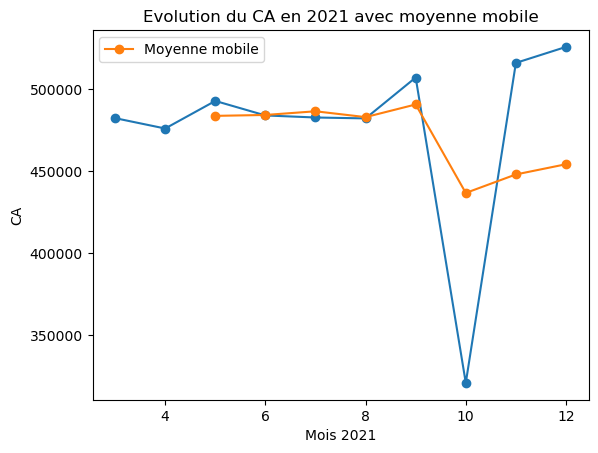

In [95]:
CA_21['Moyenne mobile'] = CA_21['price'].rolling(window=3).mean()

plt.plot(CA_21['mois'], CA_21['price'], marker='o', linestyle='-')

plt.plot(CA_21['mois'], CA_21['Moyenne mobile'], marker='o', linestyle='-', label='Moyenne mobile')

plt.xlabel('Mois 2021')
plt.ylabel('CA')
plt.legend()
plt.title('Evolution du CA en 2021 avec moyenne mobile')
plt.grid(False)

plt.show()
#le graphique montre bien le manquement des 2 premiers mois ainsi qu'un drop lors du 10éme mois.

In [96]:
analyse_f.loc[(analyse_f["annee"] == 2021)&(analyse_f["mois_nom"] == 'January')]
#Janvier absent du fichier 2021

Empty DataFrame
Columns: [client_id, sex, birth, age du client en 2023, id_prod, date, session_id, jour_nom, jour, mois_nom, mois, annee, heure, min, price, categ, age de l'acheteur]
Index: []

In [97]:
analyse_f.loc[(analyse_f["annee"] == 2021)&(analyse_f["mois_nom"] == 'February')]
#Février absent du fichier 2021

Empty DataFrame
Columns: [client_id, sex, birth, age du client en 2023, id_prod, date, session_id, jour_nom, jour, mois_nom, mois, annee, heure, min, price, categ, age de l'acheteur]
Index: []

In [98]:
Oct_21 = analyse_f.loc[(analyse_f["annee"] == 2021)&(analyse_f["mois_nom"] == 'October')]
Oct_21 = Oct_21.groupby(["jour","categ"], as_index=False).sum()
Oct_21.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur","annee","mois"], inplace = True)
Oct_21.sort_values(by = 'jour', ascending = True)
pd.set_option('display.max_rows', None)
display(Oct_21)

jour  categ    price
0    1.0    0.0  6950.50
1    1.0    1.0  7003.79
2    1.0    2.0  3104.05
3    2.0    0.0  7141.01
4    2.0    2.0  2041.12
5    3.0    0.0  6786.57
6    3.0    2.0  2206.48
7    4.0    0.0  6533.60
8    4.0    2.0  2746.08
9    5.0    0.0  6357.91
10   5.0    2.0  3032.55
11   6.0    0.0  7546.58
12   6.0    2.0  1944.11
13   7.0    0.0  6404.01
14   7.0    2.0  1787.07
15   8.0    0.0  7069.53
16   8.0    2.0  3137.82
17   9.0    0.0  6808.69
18   9.0    2.0  2616.67
19  10.0    0.0  6490.98
20  10.0    2.0  2334.67
21  11.0    0.0  7005.40
22  11.0    2.0  3225.16
23  12.0    0.0  6706.97
24  12.0    2.0  2264.18
25  13.0    0.0  6760.40
26  13.0    2.0  2666.82
27  14.0    0.0  6422.39
28  14.0    2.0  3047.39
29  15.0    0.0  6697.08
30  15.0    2.0  2701.75
31  16.0    0.0  6898.14
32  16.0    2.0  3330.88
33  17.0    0.0  6492.60
34  17.0    2.0  3065.38
35  18.0    0.0  6376.43
36  18.0    2.0  2707.29
37  19.0    0.0  5785.71
38  19.0    2.0  2816.00
39  20.0    0.0  5902.77
40  20.0    2.0  3118.42
41  21.0    0.0  6438.85
42  21.0    2.0  3132.94
43  22.0    0.0  6051.86
44  22.0    2.0  2416.00
45  23.0    0.0  5704.26
46  23.0    2.0  3206.38
47  24.0    0.0  6036.65
48  24.0    2.0  3886.54
49  25.0    0.0  5817.82
50  25.0    2.0  2258.22
51  26.0    0.0  6335.01
52  26.0    2.0  2685.78
53  27.0    0.0  5822.24
54  27.0    2.0  3967.29
55  28.0    0.0  5837.61
56  28.0    1.0  6317.99
57  28.0    2.0  2602.82
58  29.0    0.0  6410.57
59  29.0    1.0  6425.18
60  29.0    2.0  3617.88
61  30.0    0.0  5734.62
62  30.0    1.0  6753.69
63  30.0    2.0  2898.47
64  31.0    0.0  5924.07
65  31.0    1.0  7261.67
66  31.0    2.0  3219.38

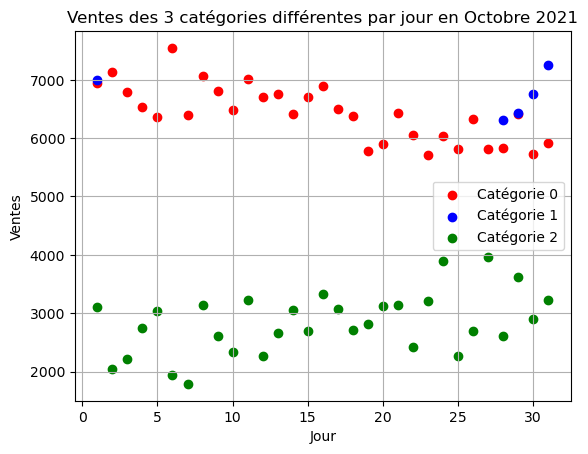

In [99]:
colors = {0: 'red', 1: 'blue', 2: 'green'}
for category, color in colors.items():
    category_data = Oct_21[Oct_21['categ'] == category]
    plt.scatter(category_data['jour'], category_data['price'], c=color, label=f'Catégorie {category}')

plt.xlabel('Jour')
plt.ylabel('Ventes')
plt.title('Ventes des 3 catégories différentes par jour en Octobre 2021')
plt.grid(True)
plt.legend()
plt.show()

In [100]:
Oct_21.loc[Oct_21["categ"] == 1]
#la catégorie 1 est sous représenté sur le mois d'Octobre 

jour  categ    price
1    1.0    1.0  7003.79
56  28.0    1.0  6317.99
59  29.0    1.0  6425.18
62  30.0    1.0  6753.69
65  31.0    1.0  7261.67

In [101]:
Prod_21 = analyse_f.loc[analyse_f['annee'] == 2021]
Ana_prod21 = Prod_21.groupby(['id_prod'], as_index=False).sum()
Ana_prod21.drop(columns = ["birth", "age du client en 2023", "heure", "min","annee","mois","min","categ","age de l'acheteur","jour"], inplace = True)
Ana_prod21.sort_values(by = 'price', ascending = False)
#display(Ana_prod21)

id_prod     price
3086   2_159  39563.29
3060   2_135  27389.03
3036   2_112  26149.59
3025   2_102  23242.02
3034   2_110  23219.25
3142   2_209  22746.75
3094   2_166  20703.60
2610   1_395  20524.92
3196    2_43  20507.07
2582   1_369  20319.53
3191    2_39  20180.52
3135   2_202  19933.15
2598   1_383  19887.14
2632   1_414  19421.45
2724   1_498  18812.85
2623   1_406  18136.11
2600   1_385  17985.08
2651   1_431  17969.58
2579   1_366  17837.50
3141   2_208  17558.40
2635   1_417  17463.68
2592   1_378  17376.33
3189    2_37  17342.46
2593   1_379  17300.59
3095   2_167  17300.27
3024   2_101  16957.35
2604   1_389  16893.24
3031   2_108  16536.96
3140   2_207  16469.77
2678   1_456  16283.52
3032   2_109  15765.08
3091   2_163  15384.77
3088   2_160  14827.88
2652   1_432  14399.00
3184    2_32  14114.87
3122   2_191  13937.95
3083   2_156  13759.04
2611   1_396  13745.40
2631   1_413  13456.52
2644   1_425  13354.14
2620   1_403  13150.69
3085   2_158  13102.66
2612   1_397  12913.20
2657   1_437  12901.22
2679   1_457  12897.39
2490   1_286  12718.08
2608   1_392  12695.11
3217    2_62  12435.84
2630   1_412  12321.00
2590   1_376  12312.96
2645   1_426  12033.36
2624   1_407  11976.51
2699   1_475  11901.33
2617   1_400  11835.80
3199    2_46  11814.66
3027   2_104  11747.85
3111   2_181  11713.98
2663   1_442  11640.68
2603   1_388  11589.80
2482   1_279  11475.90
2662   1_441  11195.52
2705   1_480  11161.80
2666   1_445  11131.36
2469   1_267  11112.03
3249    2_96  11067.21
3194    2_41  11038.40
3082   2_155  10995.66
2485   1_281  10675.55
2667   1_446  10596.56
3092   2_164  10556.52
3097   2_169  10527.06
2691   1_468  10525.75
2596   1_381  10393.50
2480   1_277  10344.02
2467   1_265  10320.87
3073   2_147  10191.44
3101   2_172  10122.88
2464   1_262  10080.00
2486   1_282  10068.80
465   0_1421  10054.97
3104   2_175   9941.37
3114   2_184   9922.00
3037   2_113   9916.26
3090   2_162   9870.72
2457   1_256   9820.85
487   0_1441   9798.84
2673   1_451   9781.34
3077   2_150   9773.06
457   0_1414   9767.52
3225     2_7   9728.61
2563   1_351   9653.67
2491   1_287   9566.81
2477   1_274   9418.40
3070   2_144   9287.78
498   0_1451   9195.40
3166   2_230   9183.44
2554   1_343   9180.72
3145   2_211   9179.55
3115   2_185   8929.97
519   0_1470   8925.21
3234    2_79   8902.41
2653   1_433   8887.32
2685   1_462   8863.12
460   0_1417   8833.09
3099   2_170   8810.68
2708   1_483   8810.49
3089   2_161   8777.23
494   0_1448   8750.28
2580   1_367   8715.77
475   0_1430   8679.69
2565   1_353   8636.80
2534   1_325   8564.94
3022    2_10   8512.17
2458   1_257   8506.30
3161   2_226   8481.75
391   0_1355   8431.56
2681   1_459   8378.76
3147   2_213   8359.56
2449   1_249   8322.38
3061   2_136   8313.60
3120    2_19   8258.82
2687   1_464   8255.50
2521   1_313   8229.06
2512   1_305   8217.26
389   0_1353   8215.89
2578   1_365   8184.15
2689   1_466   8110.53
525   0_1476   8049.24
2492   1_288   7952.40
2498   1_293   7931.55
3243     2_9   7863.57
3108   2_179   7848.43
3080   2_153   7839.44
2654   1_434   7808.04
2547   1_337   7796.88
377   0_1342   7776.51
2576   1_363   7764.43
477   0_1432   7756.80
522   0_1473   7723.17
3084   2_157   7721.46
379   0_1344   7711.20
2613   1_398   7708.86
2584   1_370   7656.24
2481   1_278   7652.82
453   0_1410   7647.75
528   0_1479   7579.26
394   0_1358   7568.91
403   0_1366   7492.50
2669   1_448   7391.44
3051   2_127   7381.93
369   0_1335   7375.90
2537   1_328   7339.24
439   0_1399   7267.96
430   0_1390   7244.38
411   0_1373   7235.19
368   0_1334   7202.44
2529   1_320   7139.60
3096   2_168   7123.68
2451   1_250   7099.92
2549   1_339   7080.92
380   0_1345   7070.07
3078   2_151   7064.55
2508   1_301   7053.48
3054    2_13   7036.62
2713   1_488   7033.63
2520   1_312   6999.60
2675   1_453   6981.01
2546   1_336   6926.64
3043    2_12   6891.29
2670   1_449   6865.42
2501   1_296   6833.59
2684   1_461   6832.74
393   0_1357   6827.73
480

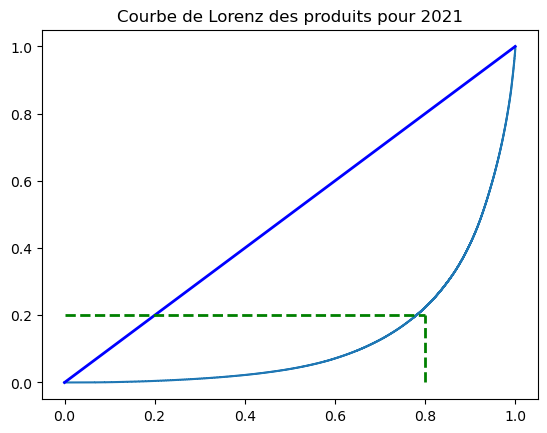

In [102]:
pop1 = Ana_prod21['price'].values
n = len(pop1)
lorenz = np.cumsum(np.sort(pop1)) / pop1.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b-', lw=2) 
plt.plot([0.0, 0.80], [0.2, 0.2], 'g--', lw=2)
plt.plot([0.8, 0.80], [0.0, 0.2], 'g--', lw=2)
plt.title('Courbe de Lorenz des produits pour 2021')
plt.show()

In [103]:
CA_22 = analyse_f.loc[analyse_f['annee'] == 2022]
CA_22.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "jour", "categ","annee"], inplace = True)
CA_22 = CA_22.groupby(['mois'], as_index=False).sum()
CA_22.sort_values(by = 'price', ascending = False)
display(CA_22)

C:\Users\Théo\AppData\Local\Temp\ipykernel_3208\1573538100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_22.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "jour", "categ","annee"], inplace = True)


mois      price
0    1.0  525338.99
1    2.0  535571.50
2    3.0  515456.53
3    4.0  492998.94
4    5.0  517132.60
5    6.0  496016.12
6    7.0  510783.12
7    8.0  506467.27
8    9.0  494114.53
9   10.0  507917.77
10  11.0  496664.94
11  12.0  510219.50

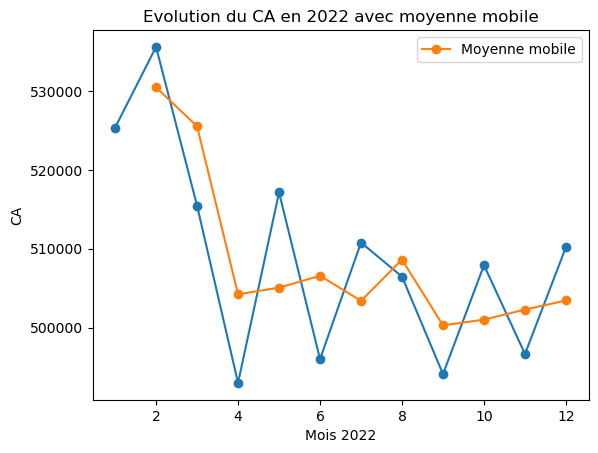

In [104]:
CA_22['Moyenne mobile'] = CA_22['price'].rolling(window=2).mean()

plt.plot(CA_22['mois'], CA_22['price'], marker='o', linestyle='-')

plt.plot(CA_22['mois'], CA_22['Moyenne mobile'], marker='o', linestyle='-', label='Moyenne mobile')

plt.xlabel('Mois 2022')
plt.ylabel('CA')
plt.legend()
plt.title('Evolution du CA en 2022 avec moyenne mobile')
plt.grid(False)
plt.show()

In [105]:
Prod_22 = analyse_f.loc[analyse_f['annee'] == 2022]
Ana_prod22 = Prod_22.groupby(['id_prod'], as_index=False).sum()
Ana_prod22.drop(columns = ["birth", "age du client en 2023", "heure", "min","annee","mois","min","categ","age de l'acheteur","jour"], inplace = True)
Ana_prod22.sort_values(by = 'price', ascending = False)

id_prod     price
3056   2_159  47592.74
3030   2_135  36633.69
3006   2_112  32771.45
2995   2_102  31403.34
3112   2_209  29395.80
2581   1_395  29163.94
2553   1_369  28811.99
3159    2_39  27951.18
2603   1_414  27690.46
2569   1_383  27366.56
2695   1_498  27132.57
3064   2_166  26684.64
3004   2_110  26020.50
3164    2_43  25686.33
2594   1_406  25579.11
2550   1_366  25257.90
2606   1_417  25125.03
2622   1_431  24995.07
2571   1_385  24950.40
2564   1_379  24857.79
2563   1_378  24800.52
2575   1_389  24065.37
3065   2_167  23699.00
3111   2_208  23648.97
2649   1_456  23266.21
3157    2_37  22437.42
3105   2_202  21622.40
2994   2_101  21564.63
3002   2_109  21164.08
3001   2_108  20782.08
3110   2_207  20243.03
3153    2_32  19972.82
2591   1_403  19267.29
2615   1_425  19232.68
2623   1_432  19118.00
3061   2_163  19110.23
2582   1_396  19065.00
3092   2_191  18765.24
2602   1_413  18619.65
3058   2_160  18346.36
2583   1_397  17983.53
2461   1_286  17811.20
2579   1_392  17784.02
2628   1_437  17435.54
2616   1_426  17379.36
2650   1_457  17334.46
2601   1_412  17182.80
3185    2_62  17129.76
3055   2_158  17058.18
2561   1_376  16982.79
2633   1_441  16793.28
2453   1_279  16402.14
2595   1_407  16357.77
2676   1_480  16313.40
2670   1_475  16288.24
2588   1_400  16234.80
2574   1_388  15848.30
2634   1_442  15612.50
3052   2_155  15412.72
2637   1_445  15353.60
2567   1_381  15270.45
3217    2_96  15091.65
3053   2_156  15078.40
2662   1_468  15016.50
2997   2_104  14955.75
3081   2_181  14787.45
2440   1_267  14582.79
2638   1_446  14399.84
2438   1_265  14319.27
3043   2_147  14195.22
2435   1_262  14175.00
2451   1_277  14138.56
3167    2_46  14086.71
3062   2_164  13953.42
2644   1_451  13937.36
2428   1_256  13884.65
2534   1_351  13828.23
2462   1_287  13795.40
3059   2_161  13564.81
2456   1_281  13458.39
3162    2_41  13453.05
3084   2_184  13047.43
2525   1_343  12959.37
3060   2_162  12852.50
2536   1_353  12847.24
2448   1_274  12834.40
3040   2_144  12593.60
2457   1_282  12528.00
3007   2_113  12252.85
2652   1_459  12248.34
3085   2_185  12185.23
2505   1_325  12119.67
2658   1_464  12083.05
2624   1_433  12001.68
3074   2_175  11954.04
2547   1_363  11926.98
3135   2_230  11864.32
2656   1_462  11861.92
3192     2_7  11828.31
480   0_1441  11811.78
2483   1_305  11786.07
2660   1_466  11731.02
2549   1_365  11723.62
2679   1_483  11720.67
3200    2_79  11701.91
3090    2_19  11618.34
2551   1_367  11597.71
3047   2_150  11506.99
3067   2_169  11422.98
3078   2_179  11397.72
2492   1_313  11391.93
2429   1_257  11380.05
2420   1_249  11219.12
2463   1_288  11155.45
3131   2_226  11111.75
2555   1_370  11104.17
2508   1_328  11052.72
458   0_1421  10914.54
453   0_1417  10847.97
3210     2_9  10833.03
3115   2_211  10811.47
3071   2_172  10755.56
450   0_1414  10697.76
2469   1_293  10667.36
3022   2_127  10555.47
3050   2_153  10499.25
491   0_1451  10474.76
3066   2_168  10371.24
2625   1_434  10220.28
3048   2_151  10204.35
2517   1_336  10154.36
2584   1_398  10149.66
470   0_1432  10076.16
487   0_1448  10057.14
2684   1_488  10032.37
2472   1_296  10016.02
468   0_1430  10013.76
2520   1_339   9977.66
2641   1_449   9968.35
2518   1_337   9871.05
3119   2_215   9848.03
3014    2_12   9844.70
512   0_1470   9843.12
2992    2_10   9840.31
2452   1_278   9820.16
2482   1_304   9803.52
371   0_1342   9667.04
2640   1_448   9666.79
363   0_1335   9642.64
2417   1_246   9637.50
2646   1_453   9583.15
3054   2_157   9580.33
2655   1_461   9560.64
2418   1_247   9550.45
2500   1_320   9528.62
3069   2_170   9506.26
3117   2_213   9499.50
2690   1_493   9495.36
3025    2_13   9484.14
2491   1_312   9480.16
2559   1_374   9456.93
383   0_1353   9455.27
3042   2_146   9454.60
385   0_1355   9438.03
388   0_1358   9349.83
2529   1_347   9301.77
2856   1_643   9266.91
2990     2_0   9235.71
2422   1_250   9175.92
2991     2_1   9118.40
515   0_1473   9082.32
521   0_1479   9050.34
2433   1_260   9008.93
518

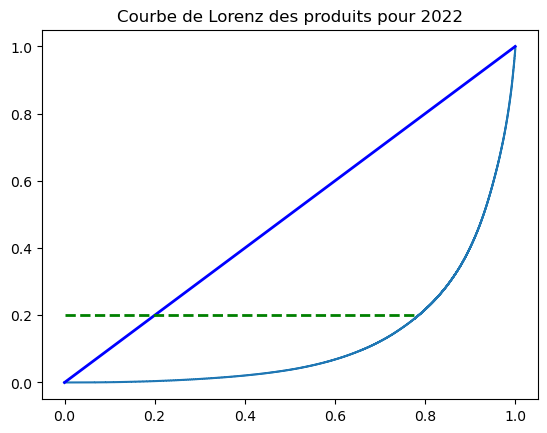

In [106]:
pop = Ana_prod22['price'].values
n = len(pop)
lorenz = np.cumsum(np.sort(pop)) / pop.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b-', lw=2) 
plt.plot([0.0, 0.78], [0.2, 0.2], 'g--', lw=2)
plt.title('Courbe de Lorenz des produits pour 2022')
plt.show()
#On observe que f(0.8) = 0.2 ce qui confirme la loi des 20/80 où 20 % des produits correspondent à environ 80% du CA

In [107]:
CA_23 = analyse_f.loc[analyse_f['annee'] == 2023]
CA_23.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "jour", "categ","annee"], inplace = True)
CA_23 = CA_23.groupby(['mois'], as_index=False).sum()
CA_23.sort_values(by = 'price', ascending = False)
display(CA_23)
#non pertinent de faire un graphique sur 2 mois 

C:\Users\Théo\AppData\Local\Temp\ipykernel_3208\3944550377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_23.drop(columns = ["birth", "age du client en 2023", "heure", "min", "age de l'acheteur", "jour", "categ","annee"], inplace = True)


mois      price
0   1.0  517540.55
1   2.0  456679.76

### Analyse client 

In [108]:
Cust_size21 = analyse_f.loc[analyse_f['annee'] == 2021]
Cust_size21 = Cust_size21.groupby(['client_id'], as_index=False).sum()
Cust_size21.drop(columns = ["categ","birth", "age du client en 2023", "heure", "min", "age de l'acheteur","annee","mois","jour"], inplace = True)
Cust_size21["% CA du client"] = (Cust_size21["price"]/Cust_size21["price"].sum())*100
Cust_size21.sort_values(by = 'price', ascending = False)
#On peut remarquer que les 4 premiers clients cumulent à eux seules 7.44% du CA et sont nettement au-dessus des autres. 

client_id      price  % CA du client
676     c_1609  135149.36        2.832829
4372    c_4958  116520.62        2.442357
6320    c_6714   60967.35        1.277920
2712    c_3454   43881.96        0.919798
7102    c_7421    2327.54        0.048787
1265    c_2140    2286.91        0.047935
3011    c_3725    2261.86        0.047410
7695    c_7959    2146.65        0.044995
7771    c_8026    2113.83        0.044307
706     c_1636    2090.21        0.043812
4242    c_4840    2072.78        0.043447
1422    c_2284    2070.56        0.043400
6988    c_7319    2068.58        0.043359
1766    c_2595    2064.28        0.043269
8175    c_8392    2062.04        0.043222
459     c_1413    2058.93        0.043157
6436     c_682    2048.15        0.042931
3855    c_4491    2013.44        0.042203
8539     c_963    2000.82        0.041939
7299     c_760    1996.64        0.041851
6622     c_699    1978.88        0.041479
5412    c_5898    1978.37        0.041468
633     c_1570    1965.91        0.041207
2887    c_3612    1956.91        0.041018
1354    c_2220    1953.10        0.040938
2502    c_3263    1952.67        0.040929
1040    c_1938    1948.85        0.040849
2246    c_3030    1947.01        0.040811
6107    c_6522    1943.88        0.040745
8356    c_8556    1943.47        0.040737
1704    c_2538    1942.93        0.040725
7497     c_778    1936.93        0.040599
8448     c_880    1932.19        0.040500
8306    c_8510    1925.06        0.040351
3472    c_4142    1923.70        0.040322
3448    c_4120    1919.66        0.040237
677      c_161    1919.21        0.040228
4536    c_5104    1918.56        0.040214
5440    c_5922    1915.15        0.040143
7923    c_8163    1906.30        0.039957
6901    c_7240    1902.76        0.039883
7067    c_7390    1896.37        0.039749
2594    c_3347    1891.13        0.039639
7674     c_794    1890.60        0.039628
5087    c_5602    1888.20        0.039578
971     c_1876    1885.79        0.039528
1668    c_2505    1876.20        0.039327
707     c_1637    1866.76        0.039129
3597    c_4256    1862.65        0.039043
2687    c_3430    1861.70        0.039023
6122    c_6536    1843.17        0.038634
1194    c_2077    1842.29        0.038616
5165    c_5674    1842.18        0.038613
5306    c_5800    1837.02        0.038505
84      c_1074    1829.03        0.038338
3125     c_383    1828.25        0.038321
7698    c_7961    1827.32        0.038302
408     c_1368    1826.58        0.038286
5468    c_5948    1812.74        0.037996
1345    c_2212    1809.35        0.037925
5882     c_632    1802.83        0.037789
8406    c_8600    1801.90        0.037769
6865    c_7208    1798.83        0.037705
7350    c_7646    1797.43        0.037675
7391    c_7683    1787.23        0.037462
4026    c_4645    1779.08        0.037291
5582     c_605    1778.03        0.037269
5216     c_572    1777.42        0.037256
6333    c_6726    1774.08        0.037186
6292     c_669    1769.08        0.037081
4203    c_4804    1753.05        0.036745
6386    c_6775    1752.24        0.036728
4745    c_5295    1749.68        0.036675
3201    c_3899    1745.89        0.036595
268     c_1240    1744.67        0.036570
3856    c_4492    1743.66        0.036548
3304    c_3991    1742.34        0.036521
5474    c_5953    1733.93        0.036344
344      c_131    1732.96        0.036324
851     c_1767    1728.75        0.036236
7956    c_8193    1726.35        0.036186
8104    c_8327    1724.17        0.036140
2193    c_2982    1718.58        0.036023
1167    c_2051    1718.16        0.036014
5934    c_6367    1717.36        0.035997
2005    c_2811    1715.96        0.035968
5535    c_6007    1710.90        0.035862
5904     c_634    1708.66        0.035815
6905    c_7244    1705.04        0.035739
7218    c_7526    1705.04        0.035739
3214     c_391    1703.97        0.035716
5518    c_5993    1703.78        0.035712
6801    c_7150    1703.01        0.035696
167     c_1149    1699.10        0.035614
8335    c_8537 

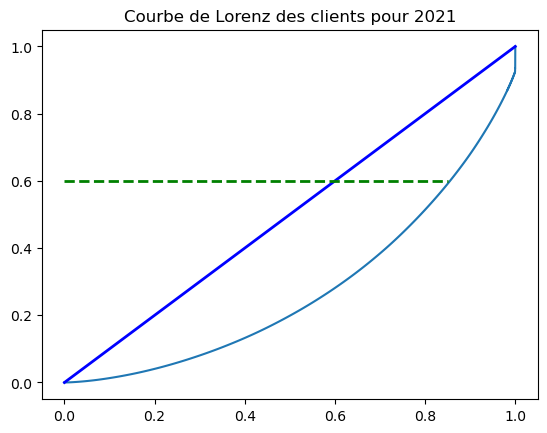

In [109]:
cust = Cust_size21['price'].values
n = len(cust)
lorenz = np.cumsum(np.sort(cust)) / cust.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b-', lw=2) 
plt.plot([0.0, 0.85], [0.6, 0.6], 'g--', lw=2) 
plt.title('Courbe de Lorenz des clients pour 2021')
plt.show()
#On remarque qu'environ 60% des clients représente 85% du chiffre d'affaire en 2021 

In [110]:
Cust_size22 = analyse_f.loc[analyse_f['annee'] == 2022]
Cust_size22 = Cust_size22.groupby(['client_id'], as_index=False).sum()
Cust_size22.drop(columns = ["categ","birth", "age du client en 2023", "heure", "min", "age de l'acheteur","annee","mois","jour"], inplace = True)
Cust_size22["% CA du client"] = (Cust_size22["price"]/Cust_size22["price"].sum())*100
Cust_size22.sort_values(by = 'price', ascending = False)
#On peut remarquer que les 4 premiers clients cumulent à eux seules 7.42% du CA et sont nettement au-dessus des autres.
#Ils sont déjà présent en 2021

client_id      price  % CA du client
675     c_1609  164358.02        2.690564
4346    c_4958  150247.66        2.459576
6279    c_6714   78655.94        1.287609
2695    c_3454   59999.26        0.982197
468     c_1422    3157.75        0.051693
2486    c_3263    3072.44        0.050296
3176    c_3892    3010.07        0.049275
2516    c_3290    2951.01        0.048308
7441    c_7773    2891.93        0.047341
2084    c_2899    2845.68        0.046584
1359    c_2234    2834.58        0.046402
632     c_1570    2826.98        0.046278
5491       c_6    2822.29        0.046201
4682    c_5263    2821.81        0.046193
6567    c_6977    2820.95        0.046179
2227    c_3028    2808.11        0.045969
6203    c_6646    2797.43        0.045794
7721    c_8026    2776.10        0.045445
3602     c_428    2752.89        0.045065
4026    c_4669    2737.11        0.044807
6944    c_7319    2722.13        0.044562
1755    c_2595    2696.11        0.044136
8279    c_8537    2677.17        0.043826
8350    c_8600    2665.31        0.043632
5841     c_632    2661.47        0.043569
3831    c_4491    2633.23        0.043106
909     c_1823    2623.29        0.042944
3237    c_3949    2610.61        0.042736
6671     c_707    2602.36        0.042601
3321    c_4023    2597.77        0.042526
7626     c_794    2582.00        0.042268
8392     c_880    2578.72        0.042214
5422    c_5935    2577.76        0.042198
966     c_1876    2572.20        0.042107
1617    c_2469    2560.12        0.041910
4392      c_50    2545.06        0.041663
2230    c_3030    2533.10        0.041467
5442    c_5953    2523.50        0.041310
6345    c_6775    2519.61        0.041246
5105    c_5645    2517.78        0.041216
1185    c_2077    2517.54        0.041212
5058    c_5602    2517.30        0.041209
1657    c_2505    2514.42        0.041161
823     c_1744    2503.40        0.040981
5863     c_634    2491.95        0.040794
1256    c_2140    2490.27        0.040766
7865    c_8159    2485.32        0.040685
8120    c_8392    2461.88        0.040301
3195     c_391    2453.28        0.040161
1969    c_2791    2450.49        0.040115
704     c_1636    2442.26        0.039980
3585    c_4263    2440.66        0.039954
1287     c_217    2438.72        0.039922
7646    c_7959    2425.03        0.039698
8242    c_8501    2408.20        0.039423
5322    c_5841    2388.27        0.039096
6122    c_6573    2370.23        0.038801
534     c_1482    2364.22        0.038703
705     c_1637    2363.07        0.038684
6538    c_6950    2356.22        0.038572
2795    c_3546    2347.77        0.038433
1574     c_243    2343.84        0.038369
7251     c_760    2340.52        0.038315
28      c_1023    2339.43        0.038297
8252    c_8510    2337.30        0.038262
6646    c_7047    2330.11        0.038144
2670    c_3430    2324.51        0.038053
2176    c_2982    2319.84        0.037976
113      c_110    2317.21        0.037933
676      c_161    2313.28        0.037869
5484    c_5993    2309.39        0.037805
985     c_1893    2308.12        0.037784
8300    c_8556    2308.06        0.037783
5940    c_6409    2307.15        0.037768
5938    c_6407    2303.81        0.037714
408     c_1368    2289.84        0.037485
7745    c_8048    2289.31        0.037476
5782    c_6266    2283.57        0.037382
5408    c_5921    2281.82        0.037354
5807    c_6289    2270.52        0.037169
848     c_1767    2269.65        0.037154
8320    c_8574    2268.49        0.037136
812     c_1734    2260.96        0.037012
267     c_1240    2260.88        0.037011
1368    c_2242    2258.04        0.036964
334     c_1300    2255.10        0.036916
4988     c_554    2251.46        0.036857
407     c_1367    2247.28        0.036788
4698    c_5278    2246.05        0.036768
5970    c_6436    2243.72        0.036730
1335    c_2212    2238.48        0.036644
2212    c_3013    2237.60        0.036630
6761    c_7150    2237.20        0.036623
4699    c_5279    2237.07        0.036621
2010     c_283 

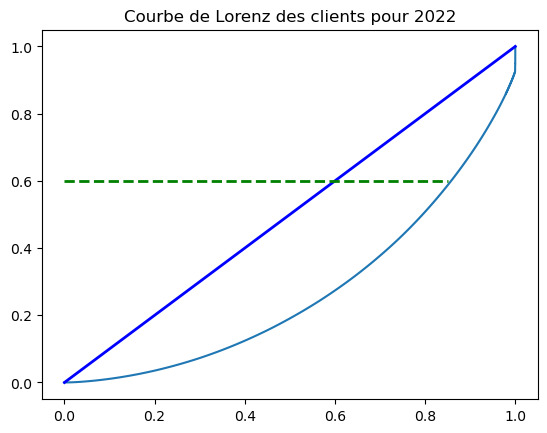

In [111]:
cust2 = Cust_size22['price'].values
n = len(cust2)
lorenz = np.cumsum(np.sort(cust2)) / cust2.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b-', lw=2) 
plt.plot([0.0, 0.85], [0.6, 0.6], 'g--', lw=2)
plt.title('Courbe de Lorenz des clients pour 2022')
plt.show()
#On remarque qu'environ 60% des clients représente 85% du chiffre d'affaire en 2022

In [112]:
Cust_size = analyse_f.groupby(['client_id'], as_index=False).sum()
Cust_size.drop(columns = ["categ","birth", "age du client en 2023", "heure", "min", "age de l'acheteur","annee","mois","jour"], inplace = True)
Cust_size["% CA du client"] = (Cust_size["price"]/Cust_size["price"].sum())*100
Cust_size.sort_values(by = 'price', ascending = False)

client_id      price  % CA du client
677     c_1609  324033.35        2.733599
4388    c_4958  289760.34        2.444466
6337    c_6714  153598.92        1.295786
2724    c_3454  113637.93        0.958668
2513    c_3263    5276.87        0.044517
634     c_1570    5271.62        0.044472
2108    c_2899    5214.05        0.043987
1268    c_2140    5208.82        0.043942
7006    c_7319    5155.77        0.043495
7715    c_7959    5085.45        0.042902
7791    c_8026    5082.58        0.042877
7120    c_7421    5050.20        0.042604
4726    c_5263    5006.85        0.042239
470     c_1422    4993.55        0.042126
973     c_1876    4970.62        0.041933
1772    c_2595    4959.66        0.041841
1673    c_2505    4930.55        0.041595
3870    c_4491    4927.64        0.041570
8195    c_8392    4923.02        0.041531
8469     c_880    4897.19        0.041313
707     c_1636    4829.47        0.040742
4258    c_4840    4826.51        0.040717
1197    c_2077    4816.78        0.040635
5491    c_5953    4809.97        0.040578
8327    c_8510    4798.63        0.040482
6261    c_6646    4775.88        0.040290
7694     c_794    4766.80        0.040214
2255    c_3030    4759.04        0.040148
8356    c_8537    4748.63        0.040060
3208    c_3892    4743.26        0.040015
5899     c_632    4742.00        0.040004
7317     c_760    4740.09        0.039988
3486    c_4142    4728.01        0.039886
708     c_1637    4698.87        0.039640
5921     c_634    4693.52        0.039595
8427    c_8600    4691.54        0.039579
2252    c_3028    4649.85        0.039227
5103    c_5602    4649.63        0.039225
1348    c_2212    4643.60        0.039174
2699    c_3430    4631.57        0.039073
7516     c_778    4603.28        0.038834
460     c_1413    4598.85        0.038797
3024    c_3725    4598.78        0.038796
6625    c_6977    4595.13        0.038765
6403    c_6775    4587.55        0.038701
8377    c_8556    4578.90        0.038628
5429    c_5898    4566.63        0.038525
915     c_1823    4558.32        0.038455
7509    c_7773    4549.62        0.038381
6919    c_7240    4546.36        0.038354
3228     c_391    4540.47        0.038304
992     c_1893    4525.07        0.038174
8317    c_8501    4514.99        0.038089
7085    c_7390    4509.12        0.038040
3638     c_428    4505.94        0.038013
6309     c_669    4499.36        0.037957
678      c_161    4482.52        0.037815
852     c_1767    4481.90        0.037810
6124    c_6522    4462.40        0.037646
2899    c_3612    4441.99        0.037473
8560     c_963    4433.11        0.037398
6729     c_707    4430.93        0.037380
7976    c_8193    4416.92        0.037262
1427    c_2284    4416.77        0.037261
1589     c_243    4400.58        0.037124
3355    c_4023    4394.06        0.037069
7938    c_8159    4362.96        0.036807
409     c_1368    4359.92        0.036781
5182    c_5674    4354.75        0.036737
5456    c_5921    4331.80        0.036544
5820    c_6249    4325.77        0.036493
4067    c_4669    4319.08        0.036436
2543    c_3290    4302.47        0.036296
5471    c_5935    4301.35        0.036287
6180    c_6573    4300.44        0.036279
2201    c_2982    4282.55        0.036128
5322     c_580    4280.71        0.036113
5542       c_6    4273.28        0.036050
6139    c_6536    4267.53        0.036002
5998    c_6409    4267.16        0.035998
6883    c_7208    4265.70        0.035986
4435      c_50    4265.51        0.035985
2994    c_3699    4257.80        0.035919
5996    c_6407    4251.85        0.035869
167     c_1149    4244.04        0.035803
8124    c_8327    4242.73        0.035792
6819    c_7150    4236.98        0.035744
6596    c_6950    4231.40        0.035697
6923    c_7244    4230.50        0.035689
2606    c_3347    4229.69        0.035682
268     c_1240    4225.63        0.035648
5535    c_5993    4217.83        0.035582
1709    c_2538    4213.68        0.035547
7943    c_8163    4212.80        0.035540
1357    c_2220 

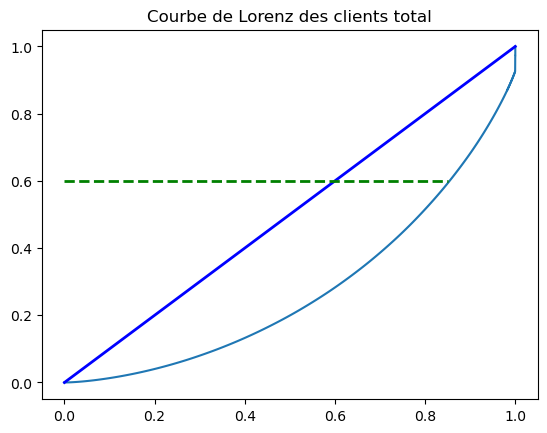

In [113]:
cust_tot = Cust_size['price'].values
n = len(cust_tot)
lorenz = np.cumsum(np.sort(cust_tot)) / cust_tot.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b-', lw=2) 
plt.plot([0.0, 0.85], [0.6, 0.6], 'g--', lw=2)
plt.title('Courbe de Lorenz des clients total')
plt.show()

In [114]:
box_custo = Cust_size[["client_id","price"]]
pd.set_option('display.max_rows', 10)
display(box_custo)

client_id    price
0          c_1   558.18
1         c_10  1353.60
2        c_100   254.85
3       c_1000  2261.89
4       c_1001  1812.86
...        ...      ...
8595     c_995   189.41
8596     c_996  1625.58
8597     c_997  1490.01
8598     c_998  2779.88
8599     c_999   701.40

[8600 rows x 2 columns]

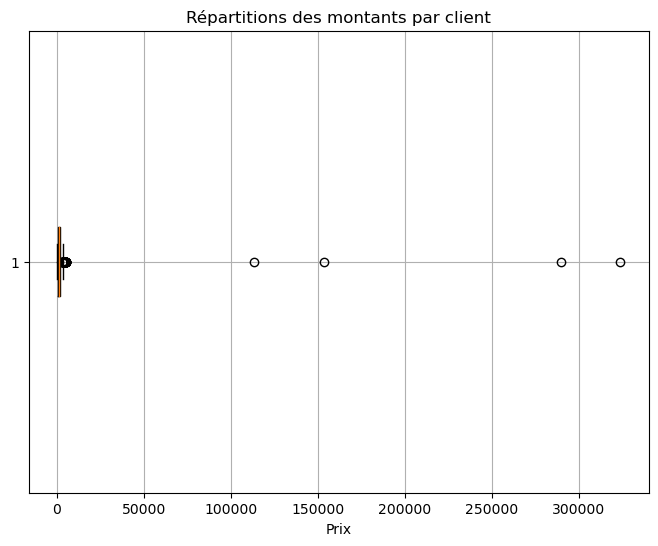

In [115]:
plt.figure(figsize=(8, 6))
plt.boxplot(box_custo['price'], vert=False)
plt.xlabel('Prix')
plt.title('Répartitions des montants par client')
plt.grid(True)
plt.show()
#Met en évidence les 4 cllients pro vu préccédemment

In [116]:
Pro_cust = Cust_size.loc[Cust_size["% CA du client"] > 0.9]
display(Pro_cust)
#on isole les 4 client pro

client_id      price  % CA du client
677     c_1609  324033.35        2.733599
2724    c_3454  113637.93        0.958668
4388    c_4958  289760.34        2.444466
6337    c_6714  153598.92        1.295786

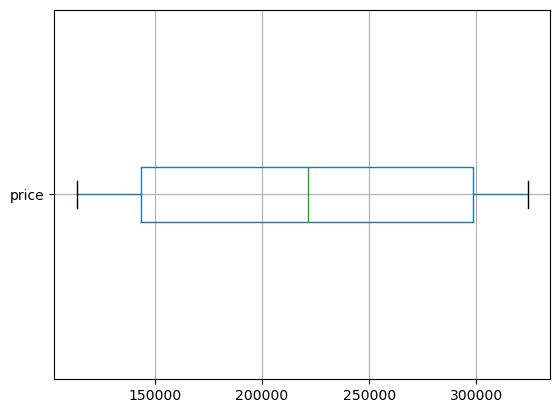

In [117]:
Pro_cust.boxplot(column="price", vert=False)
plt.show()

In [118]:
graph_pro = analyse_f[["client_id","session_id","price"]]
clients_to_search = ['c_1609', 'c_3454', 'c_4958','c_6714']
filtered_df = graph_pro[graph_pro['client_id'].isin(clients_to_search)]
display(filtered_df)
#On regroupe les transactions des clients pro pour analyse

client_id session_id  price
67        c_6714     s_9288   7.20
127       c_1609   s_128411   7.20
128       c_1609   s_230557   7.20
129       c_1609   s_233383   7.20
130       c_1609    s_43751   7.20
...          ...        ...    ...
678939    c_3454   s_280063   7.99
678940    c_3454   s_135359   7.99
678941    c_3454    s_46311   7.99
679212    c_3454   s_326137   7.99
679213    c_3454    s_61583   7.99

[46634 rows x 3 columns]

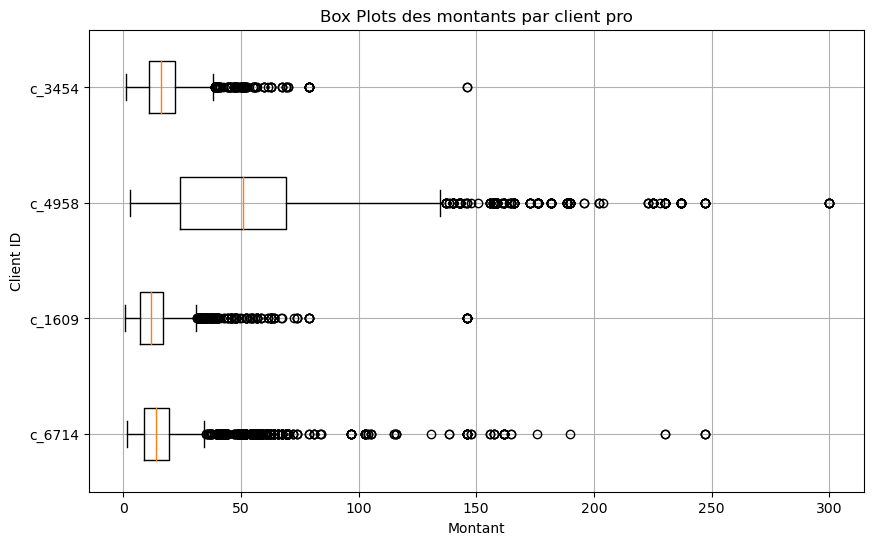

In [119]:
grouped = filtered_df.groupby('client_id')['price']

plt.figure(figsize=(10, 6))
plt.boxplot([grouped.get_group(client) for client in filtered_df['client_id'].unique()], vert=False, labels=filtered_df['client_id'].unique())
plt.xlabel('Montant')
plt.ylabel('Client ID')
plt.title('Box Plots des montants par client pro')
plt.grid(True)
plt.show()

#boxplot des montants par clients où l'on voit que le C_4958 a une amplitude plus élevé que les autres 

### Analyses Bivariées

#### Analyse Sexe/categorie

In [120]:
Categ_genre = analyse_f[['client_id','sex','categ','id_prod']]
Categ_genre = analyse_f.groupby(['sex','categ','client_id','id_prod'], as_index=False).sum()
display(Categ_genre)

sex  categ client_id id_prod   birth  age du client en 2023  jour  \
0        f    0.0    c_1000  0_1033  5898.0                  171.0  21.0   
1        f    0.0    c_1000  0_1090  3932.0                  114.0  34.0   
2        f    0.0    c_1000  0_1134  3932.0                  114.0  40.0   
3        f    0.0    c_1000  0_1139  5898.0                  171.0  72.0   
4        f    0.0    c_1000  0_1176  5898.0                  171.0  12.0   
...     ..    ...       ...     ...     ...                    ...   ...   
306968   m    2.0     c_998   2_208  4002.0                   44.0  10.0   
306969   m    2.0     c_998   2_211  4002.0                   44.0  44.0   
306970   m    2.0     c_998    2_39  8004.0                   88.0  28.0   
306971   m    2.0     c_998    2_43  2001.0                   22.0  18.0   
306972   m    2.0     c_998     2_9  8004.0                   88.0  28.0   

        mois   annee  heure    min   price  age de l'acheteur  
0       16.0  6066.0   69.0   63.0   23.97              168.0  
1       19.0  4043.0   42.0   88.0   27.56              111.0  
2       12.0  4043.0   40.0   54.0   23.44              111.0  
3       14.0  6066.0   39.0  102.0   11.97              168.0  
4       18.0  6066.0   66.0    9.0   22.95              168.0  
...      ...     ...    ...    ...     ...                ...  
306968  12.0  4043.0   36.0   12.0  109.74               41.0  
306969   5.0  4044.0   46.0   92.0  407.98               42.0  
306970  24.0  8088.0   64.0   36.0  231.96               84.0  
306971   3.0  2021.0    1.0   32.0   69.99               20.0  
306972  24.0  8088.0   56.0  228.0  219.96               84.0  

[306973 rows x 13 columns]

In [121]:
excluded_clients = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
Categ_genre = Categ_genre[~Categ_genre['client_id'].isin(excluded_clients)]
display(Categ_genre)
#On exclut les 4 clients pro qui risquent de perturber les analyses de corrélations 

sex  categ client_id id_prod   birth  age du client en 2023  jour  \
0        f    0.0    c_1000  0_1033  5898.0                  171.0  21.0   
1        f    0.0    c_1000  0_1090  3932.0                  114.0  34.0   
2        f    0.0    c_1000  0_1134  3932.0                  114.0  40.0   
3        f    0.0    c_1000  0_1139  5898.0                  171.0  72.0   
4        f    0.0    c_1000  0_1176  5898.0                  171.0  12.0   
...     ..    ...       ...     ...     ...                    ...   ...   
306968   m    2.0     c_998   2_208  4002.0                   44.0  10.0   
306969   m    2.0     c_998   2_211  4002.0                   44.0  44.0   
306970   m    2.0     c_998    2_39  8004.0                   88.0  28.0   
306971   m    2.0     c_998    2_43  2001.0                   22.0  18.0   
306972   m    2.0     c_998     2_9  8004.0                   88.0  28.0   

        mois   annee  heure    min   price  age de l'acheteur  
0       16.0  6066.0   69.0   63.0   23.97              168.0  
1       19.0  4043.0   42.0   88.0   27.56              111.0  
2       12.0  4043.0   40.0   54.0   23.44              111.0  
3       14.0  6066.0   39.0  102.0   11.97              168.0  
4       18.0  6066.0   66.0    9.0   22.95              168.0  
...      ...     ...    ...    ...     ...                ...  
306968  12.0  4043.0   36.0   12.0  109.74               41.0  
306969   5.0  4044.0   46.0   92.0  407.98               42.0  
306970  24.0  8088.0   64.0   36.0  231.96               84.0  
306971   3.0  2021.0    1.0   32.0   69.99               20.0  
306972  24.0  8088.0   56.0  228.0  219.96               84.0  

[302113 rows x 13 columns]

In [122]:
cont = pd.crosstab(Categ_genre['sex'], Categ_genre['categ'],margins=True, margins_name='Total')
display(cont)
#affichage table de contingence avec colonne total

categ     0.0    1.0    2.0   Total
sex                                
f       97672  51553   7896  157121
m       90684  46821   7487  144992
Total  188356  98374  15383  302113

In [123]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(Categ_genre['sex'], Categ_genre['categ'])
chi2_1, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Tableau croisé :")
display(contingency_table)
print("\nRésultats du test Chi2 :")
print(f"Valeur Chi2 : {chi2_1}")
print(f"P-value : {p}")
print(f"Nombre de degrés de liberté : {dof}")
print("Tableau des fréquences attendues :")
print(expected)

#La probabilité d'erreur pour un dl de 2 et un résultat de CHi2 de 10.82 est inf à 0.1%, la p value est très faible (0.0045)
#Le score chi2 montre une divergence forte entre les fréquences obtenus et attendus 
#ceci suggère que les variables sex et catégo ne sont pas indépendantes, il y a donc corrélation


Tableau croisé :


categ    0.0    1.0   2.0
sex                      
f      97672  51553  7896
m      90684  46821  7487


Résultats du test Chi2 :
Valeur Chi2 : 10.819945977233003
P-value : 0.00447176099816825
Nombre de degrés de liberté : 2
Tableau des fréquences attendues :
[[97958.98579671 51161.72178622  8000.29241708]
 [90397.01420329 47212.27821378  7382.70758292]]


In [124]:
n = 97672 + 51553 + 7896 + 90684 + 46821 + 7487
num_rows = 2
num_cols = 3
v_cramer = np.sqrt(chi2_1 / (n * min(num_rows - 1, num_cols - 1)))
print("V de Cramer:", v_cramer)
#Le V de Cramer est très faible (>0.10)
#ce qui suggére que l'intensité de la relation entre les variables est également très faible 

V de Cramer: 0.0059844995610012506


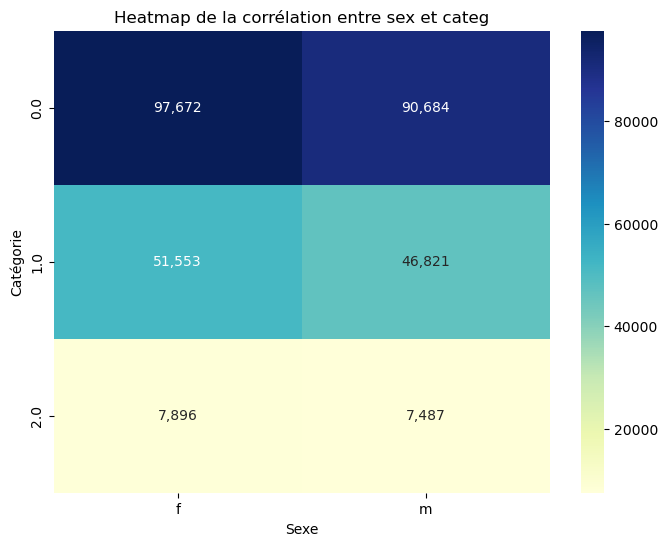

In [125]:
data = {
    'categ': [0.0, 0.0, 1.0, 1.0, 2.0, 2.0],
    'sex': ['f', 'm', 'f', 'm', 'f', 'm'],
    'count': [97672, 90684, 51553, 46821, 7896, 7487]
}
df_heatmap = pd.DataFrame(data)

heatmap_data = df_heatmap.pivot(index='categ', columns='sex', values='count')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=',', cmap='YlGnBu')
plt.title("Heatmap de la corrélation entre sex et categ")
plt.xlabel("Sexe")
plt.ylabel("Catégorie")
plt.show()

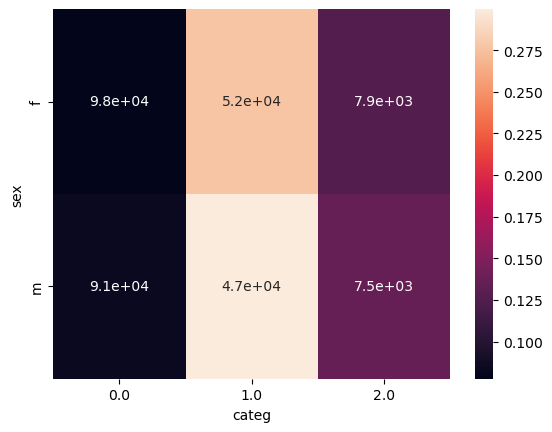

In [126]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(Categ_genre)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
#on remarque que les disparités de distributions sont légérmeent plus forte pour la catégorie 1

#### Analyse Age/montant

In [127]:
age_mont = analyse_f[['client_id',"age du client en 2023",'price','session_id']]
excluded_clients = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
age_mont = age_mont[~age_mont['client_id'].isin(excluded_clients)]
age_mont = age_mont.groupby(['client_id',"age du client en 2023"], as_index=False).sum()

display(age_mont)

client_id  age du client en 2023    price
0          c_1                   68.0   558.18
1         c_10                   67.0  1353.60
2        c_100                   31.0   254.85
3       c_1000                   57.0  2261.89
4       c_1001                   41.0  1812.86
...        ...                    ...      ...
8591     c_995                   68.0   189.41
8592     c_996                   53.0  1625.58
8593     c_997                   29.0  1490.01
8594     c_998                   22.0  2779.88
8595     c_999                   59.0   701.40

[8596 rows x 3 columns]

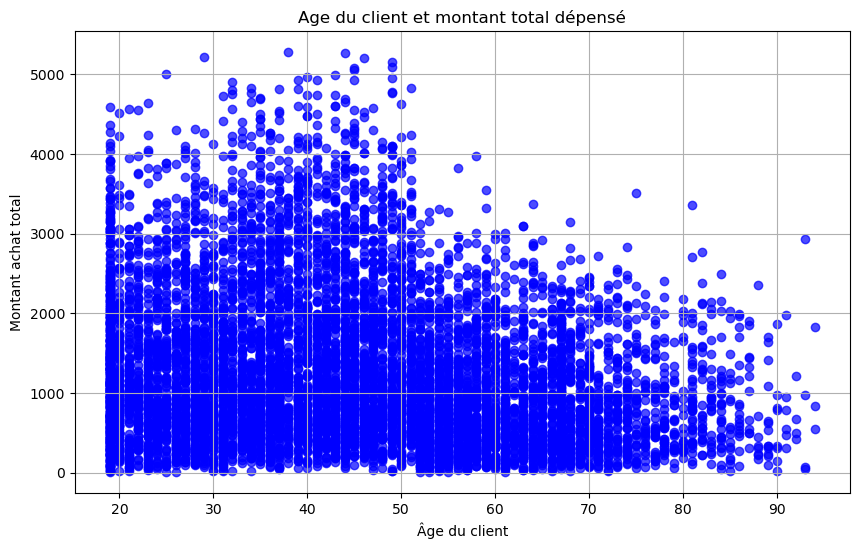

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(age_mont['age du client en 2023'], age_mont['price'], color='blue', alpha=0.7)
plt.title("Age du client et montant total dépensé")
plt.xlabel("Âge du client")
plt.ylabel("Montant achat total")
plt.grid(True)
plt.show()

In [129]:
import scipy.stats as st

print(st.pearsonr(age_mont['age du client en 2023'], age_mont['price'])[0])
print(np.cov(age_mont['age du client en 2023'], age_mont['price'],ddof=0)[1,0])
#On observe un coefficient de Pearson négatif proche de 0 et une covariance négative élevé.
#Ceci suggére que la corrélation est faible et que les variables tendent à évoluer dans des directions opposées
#Malheureusement la relation n'est pas linéaire, le test de Pearson n'est donc pas pertinent

-0.18837617927219408
-3039.235249825635


In [130]:
print(st.spearmanr(age_mont['age du client en 2023'], age_mont['price']))
#Le coefficient de Spearman est négatif proche de zéro confirme le test précédent et  indique que les variables sont peu corrélées
#Les variables ont également tendance à baisser quand l'une augmente 
# la p-value très très faible prouve la force statistique de cet indice

SpearmanrResult(correlation=-0.1851389258894352, pvalue=3.7892326770452695e-67)


In [131]:
def categorize_age(age):
    if age > 50:
        return 'Plus de 50 ans'
    else:
        return 'Moins de 50 ans'

age_mont['age_category'] = age_mont['age du client en 2023'].apply(lambda x: categorize_age(x))

display(age_mont)
#Création de deux categories d'âge

client_id  age du client en 2023    price     age_category
0          c_1                   68.0   558.18   Plus de 50 ans
1         c_10                   67.0  1353.60   Plus de 50 ans
2        c_100                   31.0   254.85  Moins de 50 ans
3       c_1000                   57.0  2261.89   Plus de 50 ans
4       c_1001                   41.0  1812.86  Moins de 50 ans
...        ...                    ...      ...              ...
8591     c_995                   68.0   189.41   Plus de 50 ans
8592     c_996                   53.0  1625.58   Plus de 50 ans
8593     c_997                   29.0  1490.01  Moins de 50 ans
8594     c_998                   22.0  2779.88  Moins de 50 ans
8595     c_999                   59.0   701.40   Plus de 50 ans

[8596 rows x 4 columns]

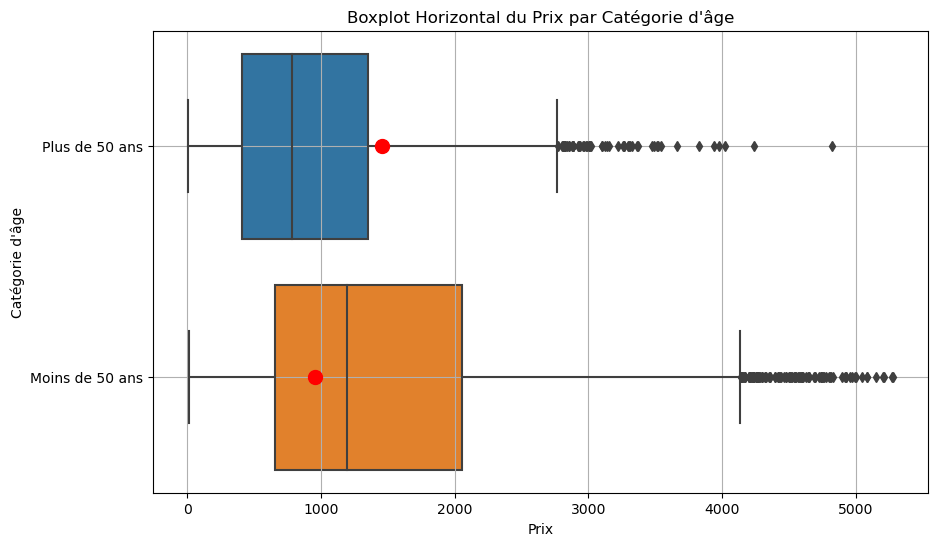

In [132]:
mean_values = age_mont.groupby('age_category')['price'].mean()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='age_category', x='price', data=age_mont, orient='h')
plt.xlabel('Prix')
plt.ylabel('Catégorie d\'âge')
plt.title('Boxplot Horizontal du Prix par Catégorie d\'âge')



for i, value in enumerate(mean_values):
    ax.scatter(value, i, color='r', marker='o', s=100, zorder=5)
plt.grid(True)
plt.show()

In [167]:
from scipy.stats import f_oneway
nova_result = f_oneway(age_mont[age_mont['age_category'] == 'Plus de 50 ans']['price'],
                        age_mont[age_mont['age_category'] == 'Moins de 50 ans']['price'])

print("Résultat de l'ANOVA entre age_category et price :")
print("Valeur F :", anova_result.statistic)
print("p-value :", anova_result.pvalue)
#Valeur F élevé annonce que la variation entre les groupes est plus grande que la variation au sein des groupes 
#la p value très faible, il y a donc une différence significative entre les catégories d'âge en terme de prix.

Résultat de l'ANOVA entre age_category et price :
Valeur F : 5.290605159426172
p-value : 0.021464611279185322


#### Analyse Age/frequence d'achat

In [135]:
age_fa = analyse_f[['client_id',"age du client en 2023",'annee','mois','session_id']]
excluded_clients = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
age_fa = age_fa[~age_fa['client_id'].isin(excluded_clients)]
age_fa = age_fa.groupby(['client_id',"age du client en 2023","annee",'mois'], as_index=False).count()
display(age_fa)

client_id  age du client en 2023   annee  mois  session_id
0            c_1                   68.0  2021.0   6.0           1
1            c_1                   68.0  2021.0   7.0           4
2            c_1                   68.0  2021.0   8.0           1
3            c_1                   68.0  2021.0   9.0           2
4            c_1                   68.0  2021.0  10.0           1
...          ...                    ...     ...   ...         ...
137028     c_999                   59.0  2022.0  10.0           1
137029     c_999                   59.0  2022.0  11.0           2
137030     c_999                   59.0  2022.0  12.0           1
137031     c_999                   59.0  2023.0   1.0           5
137032     c_999                   59.0  2023.0   2.0           1

[137033 rows x 5 columns]

In [137]:
age_fat = age_fa.groupby(['client_id',"age du client en 2023"], as_index=False).sum()
age_fat["session_id"] = round(age_fat["session_id"]/24,1)
age_fat = age_fat[["client_id","age du client en 2023","session_id"]]
display(age_fat)

client_id  age du client en 2023  session_id
0          c_1                   68.0         1.6
1         c_10                   67.0         2.4
2        c_100                   31.0         0.3
3       c_1000                   57.0         5.2
4       c_1001                   41.0         4.2
...        ...                    ...         ...
8591     c_995                   68.0         0.6
8592     c_996                   53.0         4.0
8593     c_997                   29.0         2.5
8594     c_998                   22.0         2.2
8595     c_999                   59.0         1.9

[8596 rows x 3 columns]

In [138]:
moyenne_mensuelle = round(age_fat["session_id"].mean())
print("La moyenne de fréquence d'achat  mensuelle tout âge confondu pour les client est ", moyenne_mensuelle)

La moyenne de fréquence d'achat  mensuelle tout âge confondu pour les client est  3


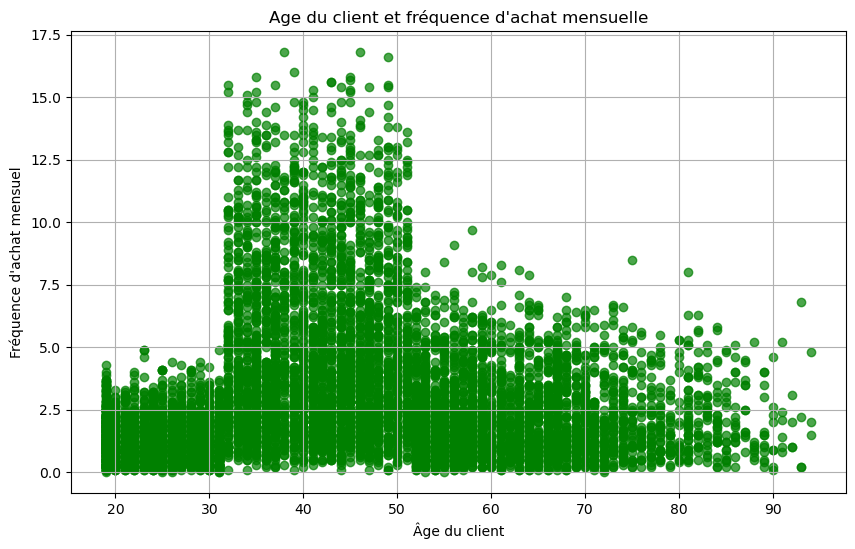

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(age_fat['age du client en 2023'], age_fat['session_id'], color='green', alpha=0.7)
plt.title("Age du client et fréquence d'achat mensuelle")
plt.xlabel("Âge du client")
plt.ylabel("Fréquence d'achat mensuel")
plt.grid(True)
plt.show()

In [140]:
def categorize_age(age):
    if age < 30:
        return 'Moins de 30 ans'
    elif 30 <= age <= 50:
        return '30-50 ans'
    else:
        return 'Plus de 50 ans'

age_fat['categorie_age'] = age_fat['age du client en 2023'].apply(categorize_age)
display(age_fat)

client_id  age du client en 2023  session_id    categorie_age
0          c_1                   68.0         1.6   Plus de 50 ans
1         c_10                   67.0         2.4   Plus de 50 ans
2        c_100                   31.0         0.3        30-50 ans
3       c_1000                   57.0         5.2   Plus de 50 ans
4       c_1001                   41.0         4.2        30-50 ans
...        ...                    ...         ...              ...
8591     c_995                   68.0         0.6   Plus de 50 ans
8592     c_996                   53.0         4.0   Plus de 50 ans
8593     c_997                   29.0         2.5  Moins de 30 ans
8594     c_998                   22.0         2.2  Moins de 30 ans
8595     c_999                   59.0         1.9   Plus de 50 ans

[8596 rows x 4 columns]

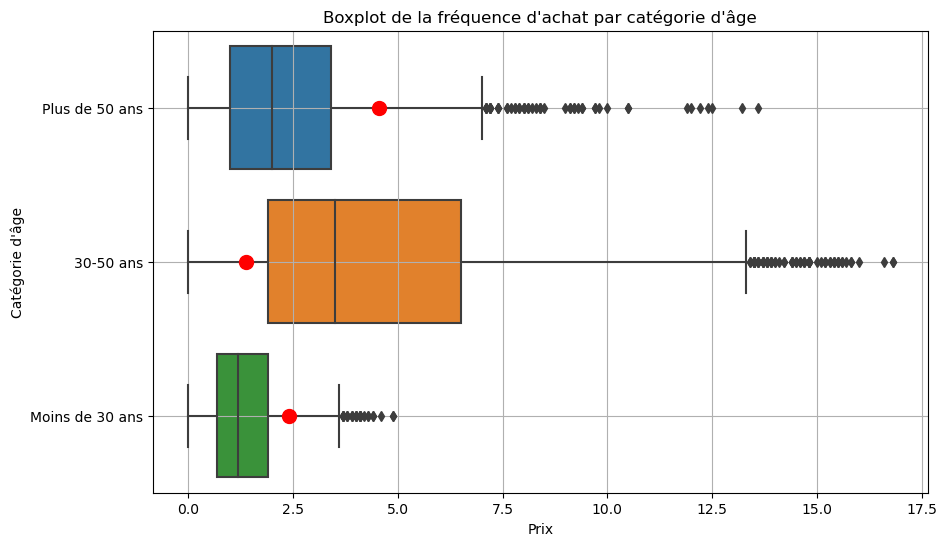

In [141]:
mean_values2 = age_fat.groupby('categorie_age')['session_id'].mean()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_age', x='session_id', data=age_fat, orient='h')
plt.xlabel('Prix')
plt.ylabel('Catégorie d\'âge')
plt.title('Boxplot de la fréquence d\'achat par catégorie d\'âge')

for i, value in enumerate(mean_values2):
    ax.scatter(value, i, color='r', marker='o', s=100, zorder=5)
plt.grid(True)
plt.show()

In [142]:
anova_result = f_oneway(*[group['session_id'] for name, group in age_fat.groupby('categorie_age')])
print("Résultat de l'ANOVA :")
print(f"Valeur F : {anova_result.statistic}")
print(f"p-value : {anova_result.pvalue}")

Résultat de l'ANOVA :
Valeur F : 1177.6137257916685
p-value : 0.0


In [143]:
age_fa_1 = age_fa.groupby(['client_id',"age du client en 2023","annee"], as_index=False).sum()
#age_fa_1 = age_fa_1.groupby(["age du client en 2023"], as_index=False).mean()
age_fa_1['session_id'] = round(age_fa_1['session_id'],1)
display(age_fa_1)
#tableau de la fréquence annuelle par âge 

client_id  age du client en 2023   annee  mois  session_id
0           c_1                   68.0  2021.0  63.0          19
1           c_1                   68.0  2022.0  57.0          18
2           c_1                   68.0  2023.0   1.0           2
3          c_10                   67.0  2021.0  60.0          28
4          c_10                   67.0  2022.0  48.0          25
...         ...                    ...     ...   ...         ...
24169     c_998                   22.0  2022.0  42.0          25
24170     c_998                   22.0  2023.0   2.0           4
24171     c_999                   59.0  2021.0  57.0          17
24172     c_999                   59.0  2022.0  74.0          23
24173     c_999                   59.0  2023.0   3.0           6

[24174 rows x 5 columns]

In [144]:
age_fa_2 = age_fa_1[['client_id','age du client en 2023', 'annee','session_id']]
age_fa_2 = age_fa_2.groupby(['client_id',"age du client en 2023",], as_index=False).mean()
#age_fa_1 = age_fa_1.groupby(["age du client en 2023"], as_index=False).mean()
age_fa_2['session_id'] = round(age_fa_2['session_id'],1)
display(age_fa_2)
#tableau de la fréquence annuelle par âge 

client_id  age du client en 2023   annee  session_id
0          c_1                   68.0  2022.0        13.0
1         c_10                   67.0  2022.0        19.3
2        c_100                   31.0  2021.5         4.0
3       c_1000                   57.0  2022.0        41.7
4       c_1001                   41.0  2022.0        34.0
...        ...                    ...     ...         ...
8591     c_995                   68.0  2021.5         7.0
8592     c_996                   53.0  2022.0        31.7
8593     c_997                   29.0  2022.0        19.7
8594     c_998                   22.0  2022.0        17.7
8595     c_999                   59.0  2022.0        15.3

[8596 rows x 4 columns]

In [145]:
moyenne_annuelle = round(age_fa_2["session_id"].mean(),)
print(moyenne_annuelle)

25


In [146]:
median_annuelle = round(age_fa_2["session_id"].median(),)
print(median_annuelle)

18


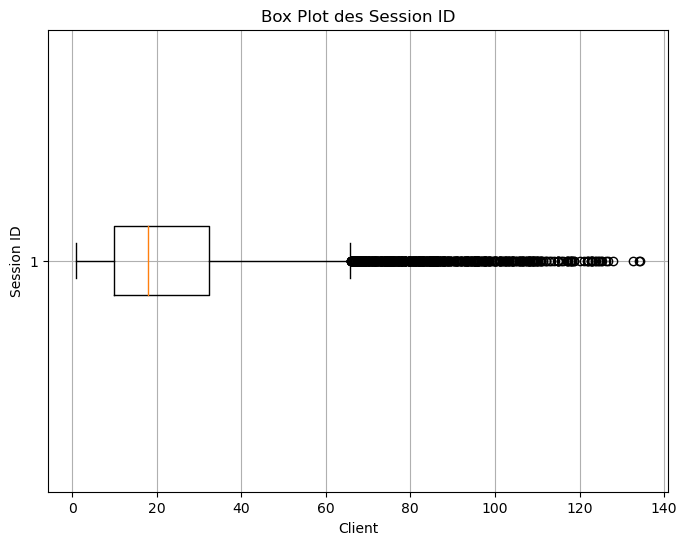

In [147]:
plt.figure(figsize=(8, 6))
plt.boxplot(age_fa_2['session_id'], vert=False)
plt.xlabel('Client')
plt.ylabel('Session ID')
plt.title('Box Plot des Session ID')
plt.grid(True)
plt.show()

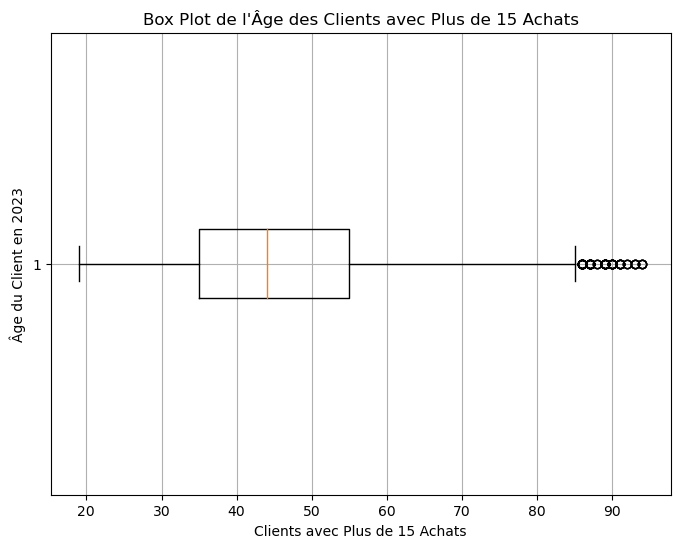

In [148]:
filtered_age_fa = age_fa_1[age_fa_1['session_id'] > 15]

plt.figure(figsize=(8, 6))
plt.boxplot(filtered_age_fa['age du client en 2023'], vert=False)
plt.xlabel('Clients avec Plus de 15 Achats')
plt.ylabel('Âge du Client en 2023')
plt.title('Box Plot de l\'Âge des Clients avec Plus de 15 Achats')
plt.grid(True)
plt.show()

In [149]:
median_annuelle_1 = round(filtered_age_fa["age du client en 2023"].median(),)
print(median_annuelle_1)

44


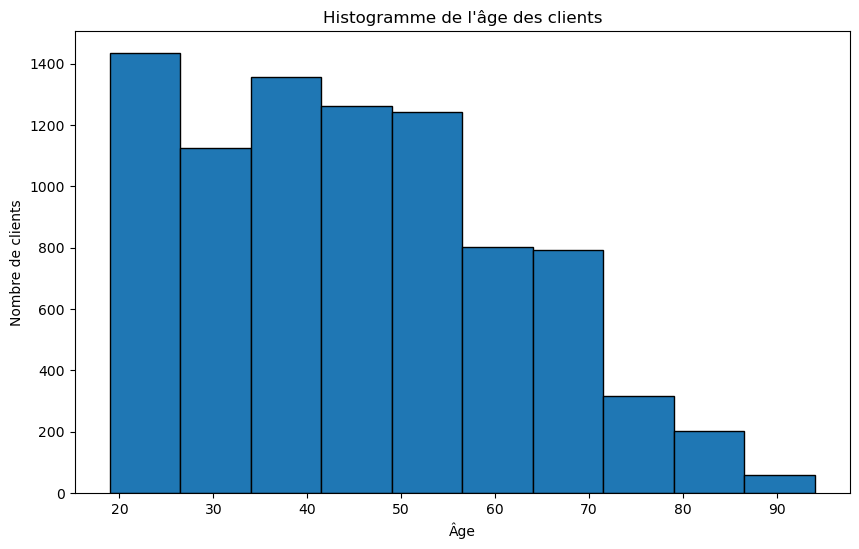

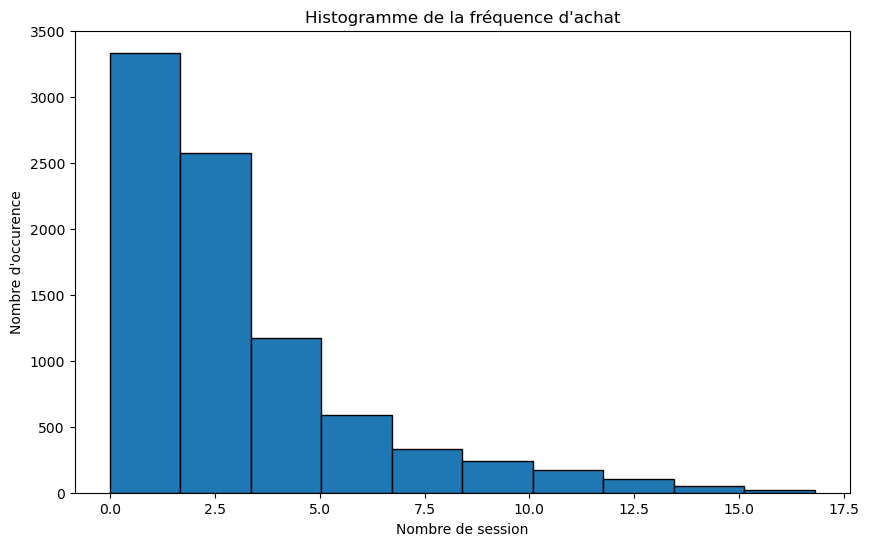

In [150]:
plt.figure(figsize=(10, 6))
plt.hist(age_fat['age du client en 2023'], bins=10, edgecolor='black')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.title('Histogramme de l\'âge des clients')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(age_fat['session_id'], bins=10, edgecolor='black')
plt.xlabel('Nombre de session')
plt.ylabel("Nombre d'occurence")
plt.title("Histogramme de la fréquence d'achat")
plt.show()

In [151]:
def categorize_age(age):
    if age > 44:
        return 'Plus de 44 ans'
    else:
        return 'Moins de 44 ans'

age_fa_2['age_category'] = age_fa_2['age du client en 2023'].apply(lambda x: categorize_age(x))

display(age_fa_2)

client_id  age du client en 2023   annee  session_id     age_category
0          c_1                   68.0  2022.0        13.0   Plus de 44 ans
1         c_10                   67.0  2022.0        19.3   Plus de 44 ans
2        c_100                   31.0  2021.5         4.0  Moins de 44 ans
3       c_1000                   57.0  2022.0        41.7   Plus de 44 ans
4       c_1001                   41.0  2022.0        34.0  Moins de 44 ans
...        ...                    ...     ...         ...              ...
8591     c_995                   68.0  2021.5         7.0   Plus de 44 ans
8592     c_996                   53.0  2022.0        31.7   Plus de 44 ans
8593     c_997                   29.0  2022.0        19.7  Moins de 44 ans
8594     c_998                   22.0  2022.0        17.7  Moins de 44 ans
8595     c_999                   59.0  2022.0        15.3   Plus de 44 ans

[8596 rows x 5 columns]

In [152]:
groups = [age_fa_2[age_fa_2['age_category'] == 'Moins de 44 ans']['session_id'],
          age_fa_2[age_fa_2['age_category'] == 'Plus de 44 ans']['session_id']]

anova_result = f_oneway(*groups)

print("Résultat de l'ANOVA :")
print(f"Valeur F : {anova_result.statistic}")
print(f"p-value : {anova_result.pvalue}")
#La valeur F est faible, la différence statistique est faible entre les groupes
#la valeur p faible également montre néanmoins que la différence entre les moyennes des groupes et les différentes catégories d'age

Résultat de l'ANOVA :
Valeur F : 5.290605159426172
p-value : 0.021464611279185322


#### Corrrelation Age/Panier moyen 

In [153]:
display(analyse_f)

client_id sex   birth  age du client en 2023 id_prod  \
0         c_4410   f  1967.0                   56.0  0_1316   
1         c_4410   f  1967.0                   56.0  0_1316   
2         c_4410   f  1967.0                   56.0  0_1316   
3         c_3654   f  1978.0                   45.0  0_1316   
4         c_3654   f  1978.0                   45.0  0_1316   
...          ...  ..     ...                    ...     ...   
679348    c_8138   f  1984.0                   39.0   0_394   
679349    c_8138   f  1984.0                   39.0   0_394   
679350    c_8138   f  1984.0                   39.0   0_394   
679351    c_8327   m  1972.0                   51.0   0_394   
679352    c_8327   m  1972.0                   51.0   0_394   

                             date session_id   jour_nom  jour  mois_nom  mois  \
0      2021-12-29 09:11:18.860592   s_141762  Wednesday  29.0  December  12.0   
1      2022-03-29 09:11:18.860592   s_186233    Tuesday  29.0     March   3.0   
2      2022-05-29 09:11:18.860592   s_215758     Sunday  29.0       May   5.0   
3      2021-11-26 03:51:34.068872   s_125143     Friday  26.0  November  11.0   
4      2022-08-26 03:51:34.068872   s_258546     Friday  26.0    August   8.0   
...                           ...        ...        ...   ...       ...   ...   
679348 2021-11-09 09:02:38.299240   s_116986    Tuesday   9.0  November  11.0   
679349 2022-08-09 09:02:38.299240   s_250653    Tuesday   9.0    August   8.0   
679350 2022-03-09 09:02:38.299240   s_176587  Wednesday   9.0     March   3.0   
679351 2022-06-28 22:44:11.200205   s_230707    Tuesday  28.0      June   6.0   
679352 2021-12-28 22:44:11.200205   s_141516    Tuesday  28.0  December  12.0   

         annee  heure   min  price  categ  age de l'acheteur  
0       2021.0    9.0  11.0   7.20    0.0               54.0  
1       2022.0    9.0  11.0   7.20    0.0               55.0  
2       2022.0    9.0  11.0   7.20    0.0               55.0  
3       2021.0    3.0  51.0   7.20    0.0               43.0  
4       2022.0    3.0  51.0   7.20    0.0               44.0  
...        ...    ...   ...    ...    ...                ...  
679348  2021.0    9.0   2.0   2.14    0.0               37.0  
679349  2022.0    9.0   2.0   2.14    0.0               38.0  
679350  2022.0    9.0   2.0   2.14    0.0               38.0  
679351  2022.0   22.0  44.0   2.14    0.0               50.0  
679352  2021.0   22.0  44.0   2.14    0.0               49.0  

[679111 rows x 17 columns]

In [154]:
Panier_moyen = analyse_f[["client_id","age du client en 2023","session_id","id_prod",]]
excluded_clients = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
Panier_moyen = Panier_moyen[~Panier_moyen['client_id'].isin(excluded_clients)]
Panier_moyen = Panier_moyen.groupby(['client_id',"age du client en 2023","session_id",], as_index=False).count()
display(Panier_moyen)

client_id  age du client en 2023 session_id  id_prod
0            c_1                   68.0   s_105105        1
1            c_1                   68.0   s_114737        5
2            c_1                   68.0   s_120172        2
3            c_1                   68.0   s_134971        1
4            c_1                   68.0   s_136532        1
...          ...                    ...        ...      ...
319232     c_999                   59.0    s_88239        1
319233     c_999                   59.0    s_89648        1
319234     c_999                   59.0    s_92374        1
319235     c_999                   59.0    s_98289        1
319236     c_999                   59.0    s_99070        1

[319237 rows x 4 columns]

In [155]:
Panier_moyen1 = Panier_moyen.groupby(['client_id','age du client en 2023'], as_index=False).mean()
Panier_moyen1["id_prod"] = round(Panier_moyen1["id_prod"],1)
display(Panier_moyen1)

client_id  age du client en 2023  id_prod
0          c_1                   68.0      1.2
1         c_10                   67.0      1.7
2        c_100                   31.0      1.6
3       c_1000                   57.0      1.3
4       c_1001                   41.0      2.2
...        ...                    ...      ...
8591     c_995                   68.0      1.6
8592     c_996                   53.0      1.2
8593     c_997                   29.0      2.5
8594     c_998                   22.0      2.3
8595     c_999                   59.0      1.1

[8596 rows x 3 columns]

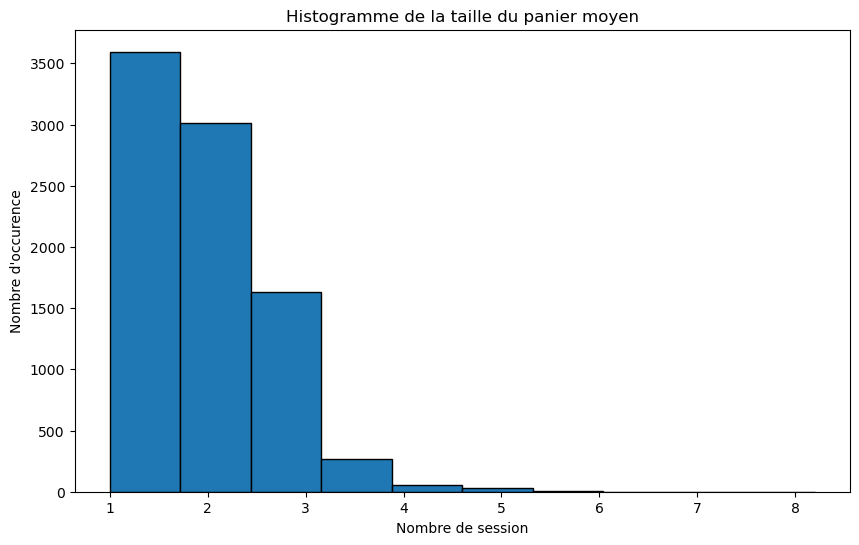

In [156]:
plt.figure(figsize=(10, 6))
plt.hist(Panier_moyen1['id_prod'], bins=10, edgecolor='black')
plt.xlabel('Nombre de session')
plt.ylabel("Nombre d'occurence")
plt.title("Histogramme de la taille du panier moyen")
plt.show()

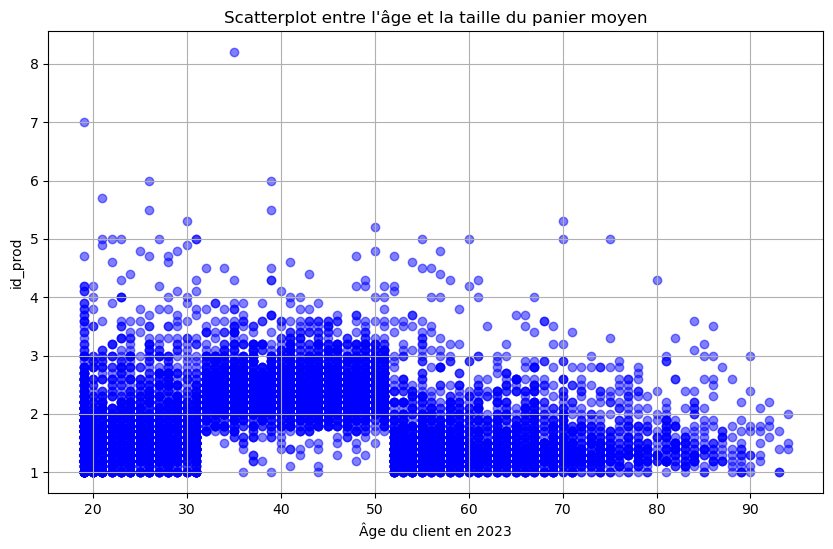

In [157]:
plt.figure(figsize=(10, 6))
plt.scatter(Panier_moyen1['age du client en 2023'], Panier_moyen1['id_prod'], c='blue', alpha=0.5)
plt.title('Scatterplot entre l\'âge et la taille du panier moyen')
plt.xlabel('Âge du client en 2023')
plt.ylabel('id_prod')
plt.grid(True)
plt.show()

In [158]:
def categorize_age(age):
    if age < 31:
        return 'Moins de 31 ans'
    elif 31 <= age <= 53:
        return '31-53 ans'
    else:
        return 'Plus de 53 ans'

Panier_moyen1['categorie_age'] = Panier_moyen1['age du client en 2023'].apply(categorize_age)

display(Panier_moyen1)

client_id  age du client en 2023  id_prod    categorie_age
0          c_1                   68.0      1.2   Plus de 53 ans
1         c_10                   67.0      1.7   Plus de 53 ans
2        c_100                   31.0      1.6        31-53 ans
3       c_1000                   57.0      1.3   Plus de 53 ans
4       c_1001                   41.0      2.2        31-53 ans
...        ...                    ...      ...              ...
8591     c_995                   68.0      1.6   Plus de 53 ans
8592     c_996                   53.0      1.2        31-53 ans
8593     c_997                   29.0      2.5  Moins de 31 ans
8594     c_998                   22.0      2.3  Moins de 31 ans
8595     c_999                   59.0      1.1   Plus de 53 ans

[8596 rows x 4 columns]

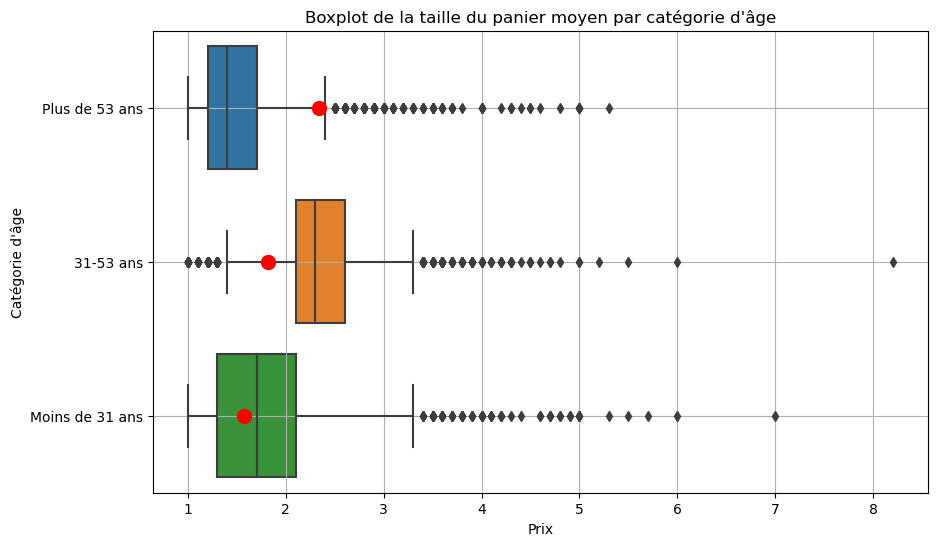

In [159]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_age', x='id_prod', data=Panier_moyen1, orient='h')
plt.xlabel('Prix')
plt.ylabel('Catégorie d\'âge')
plt.title('Boxplot de la taille du panier moyen par catégorie d\'âge')
mean_values = Panier_moyen1.groupby('categorie_age')['id_prod'].mean()

for i, value in enumerate(mean_values):
    ax.scatter(value, i, color='r', marker='o', s=100, zorder=5)
plt.grid(True)
plt.show()

In [160]:
from scipy.stats import shapiro

age_categorie_normality = shapiro(Panier_moyen1['age du client en 2023'])
id_prod_normality = shapiro(Panier_moyen1['id_prod'])

print("Test de normalité Shapiro-Wilk pour 'age_categorie':")
print("Statistique de test:", age_categorie_normality.statistic)
print("P-valeur:", age_categorie_normality.pvalue)
print("Est-ce que les données semblent normalement distribuées:", age_categorie_normality.pvalue > 0.05)
print("\nTest de normalité Shapiro-Wilk pour 'id_prod':")
print("Statistique de test:", id_prod_normality.statistic)
print("P-valeur:", id_prod_normality.pvalue)
print("Est-ce que les données semblent normalement distribuées:", id_prod_normality.pvalue > 0.05)

Test de normalité Shapiro-Wilk pour 'age_categorie':
Statistique de test: 0.9697331786155701
P-valeur: 4.628808323714737e-39
Est-ce que les données semblent normalement distribuées: False

Test de normalité Shapiro-Wilk pour 'id_prod':
Statistique de test: 0.9393643140792847
P-valeur: 0.0
Est-ce que les données semblent normalement distribuées: False


C:\Application\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [161]:
from scipy.stats import kruskal

categories = Panier_moyen1['categorie_age'].unique()
groups = [Panier_moyen1[Panier_moyen1['categorie_age'] == cat]['id_prod'] for cat in categories]

statistic, p_value = kruskal(*groups)

print("Test de Kruskal-Wallis")
print("Statistique de test:", statistic)
print("Valeur p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("L'hypothèse nulle peut être rejetée, il y a des différences significatives entre les groupes.")
else:
    print("L'hypothèse nulle ne peut pas être rejetée, il n'y a pas suffisamment de preuves pour conclure que les groupes sont différents.")

Test de Kruskal-Wallis
Statistique de test: 2849.229622462871
Valeur p: 0.0
L'hypothèse nulle peut être rejetée, il y a des différences significatives entre les groupes.


#### Analyse Age/categorie produit

In [162]:
age_cg = analyse_f[['client_id',"age du client en 2023",'categ','id_prod']]
excluded_clients = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
age_cg = age_cg[~age_cg['client_id'].isin(excluded_clients)]
age_cg = age_cg.groupby(['id_prod',"categ"], as_index=False).mean()

age_cg['age du client en 2023'] = round(age_cg['age du client en 2023'])


display(age_cg)

id_prod  categ  age du client en 2023
0        0_0    0.0                   45.0
1        0_1    0.0                   44.0
2       0_10    0.0                   49.0
3      0_100    0.0                   47.0
4     0_1000    0.0                   45.0
...      ...    ...                    ...
3257    2_95    2.0                   34.0
3258    2_96    2.0                   27.0
3259    2_97    2.0                   26.0
3260    2_98    2.0                   20.0
3261    2_99    2.0                   26.0

[3262 rows x 3 columns]

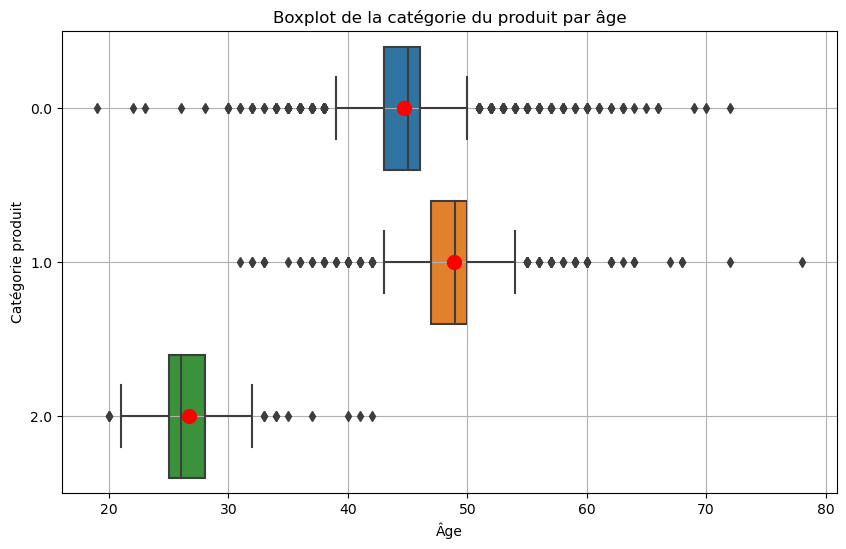

In [163]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categ', x='age du client en 2023', data=age_cg, orient='h')
plt.xlabel('Âge')
plt.ylabel('Catégorie produit')
plt.title('Boxplot de la catégorie du produit par âge')
mean_values = age_cg.groupby('categ')['age du client en 2023'].mean()

for i, value in enumerate(mean_values):
    ax.scatter(value, i, color='r', marker='o', s=100, zorder=5)
plt.grid(True)
plt.show()

In [164]:
statistic_categ, p_value_categ = shapiro(age_cg['categ'])

statistic_age, p_value_age = shapiro(age_cg['age du client en 2023'])

print("Test de Shapiro-Wilk pour la colonne 'categ':")
print("Statistique de test:", statistic_categ)
print("Valeur p:", p_value_categ)
print("Les données semblent normalement distribuées:", p_value_categ > 0.05)

print("\nTest de Shapiro-Wilk pour la colonne 'age':")
print("Statistique de test:", statistic_age)
print("Valeur p:", p_value_age)
print("Les données semblent normalement distribuées:", p_value_age > 0.05)

Test de Shapiro-Wilk pour la colonne 'categ':
Statistique de test: 0.6207349300384521
Valeur p: 0.0
Les données semblent normalement distribuées: False

Test de Shapiro-Wilk pour la colonne 'age':
Statistique de test: 0.8698163032531738
Valeur p: 0.0
Les données semblent normalement distribuées: False


In [165]:
categories_1 = age_cg['age du client en 2023'].unique()
groups_1 = [age_cg[age_cg['categ'] == cat]['age du client en 2023'] for cat in categories]

statistic, p_value = kruskal(*groups)

print("Statistique de test:", statistic)
print("Valeur p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("L'hypothèse nulle peut être rejetée, il y a des différences significatives entre les groupes.")
else:
    print("L'hypothèse nulle ne peut pas être rejetée, il n'y a pas suffisamment de preuves pour conclure que les groupes sont différents.")

Statistique de test: 2849.229622462871
Valeur p: 0.0
L'hypothèse nulle peut être rejetée, il y a des différences significatives entre les groupes.


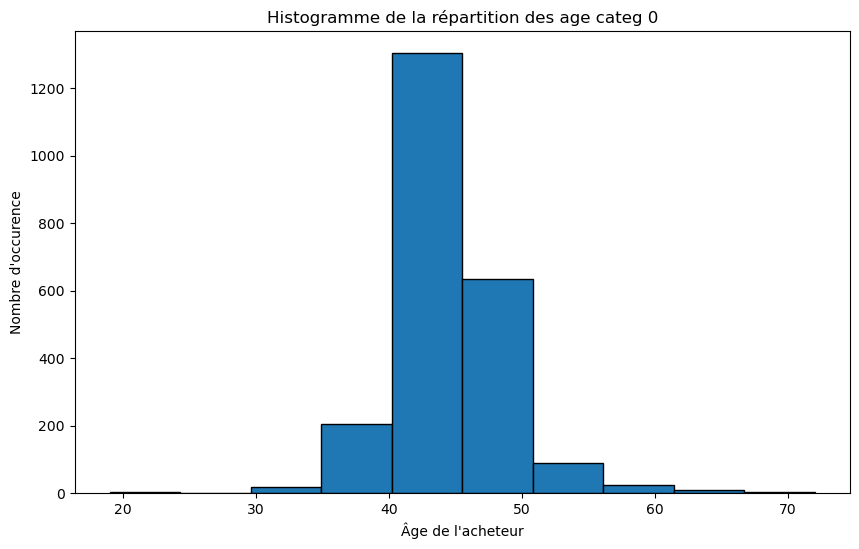

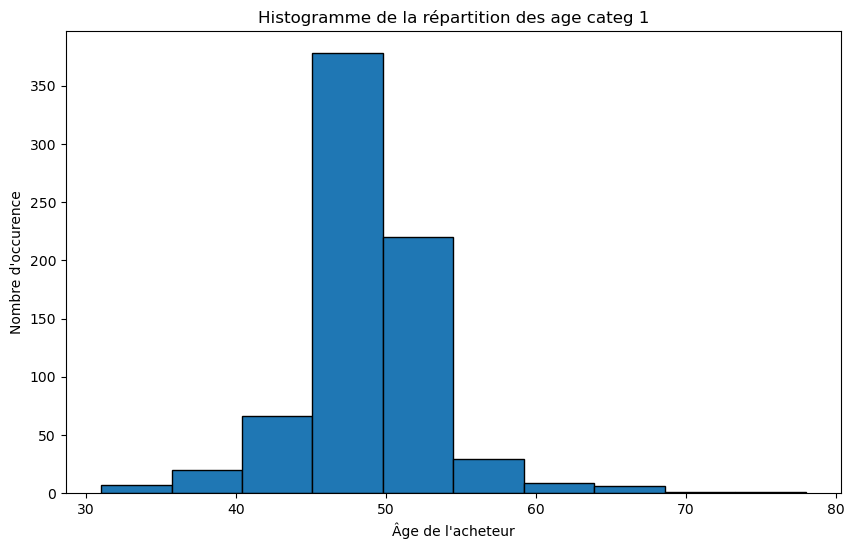

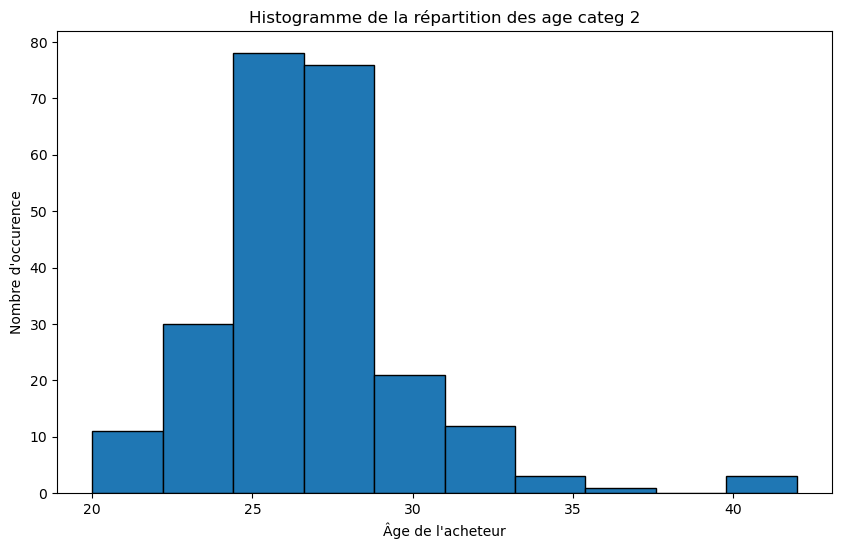

In [166]:
categ_0 = age_cg.loc[age_cg['categ'] == 0]
categ_1 = age_cg.loc[age_cg['categ'] == 1]
categ_2 = age_cg.loc[age_cg['categ'] == 2]

plt.figure(figsize=(10, 6))
plt.hist(categ_0['age du client en 2023'], bins=10, edgecolor='black')
plt.xlabel("Âge de l'acheteur")
plt.ylabel("Nombre d'occurence")
plt.title("Histogramme de la répartition des age categ 0")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(categ_1['age du client en 2023'], bins=10, edgecolor='black')
plt.xlabel("Âge de l'acheteur")
plt.ylabel("Nombre d'occurence")
plt.title("Histogramme de la répartition des age categ 1")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(categ_2['age du client en 2023'], bins=10, edgecolor='black')
plt.xlabel("Âge de l'acheteur")
plt.ylabel("Nombre d'occurence")
plt.title("Histogramme de la répartition des age categ 2")
plt.show()